In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import cv2
import statsmodels
import statsmodels.api as sm
import pickle

In [2]:
dft = pd.read_csv("scaled_features_tuscany.csv")
dfp = pd.read_csv("scaled_features_piemonte.csv")

In [ ]:
dft.columns

Index(['Wine', 'link', 'image_link', 'image_names', 'temperature', 'saturation', 'brightness',
       'contrast', 'clarity', 'colorfulness', 'quality', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor', 'diagonal_dominance',
       'figure_ground_size', 'price', 'rating', 'grade_avg'],
      dtype='object')

Нормализация

In [ ]:
dft.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,font_2_Poppins-Regular,font_2_Rakkas-Regular,font_2_RobotoMono-Regular,font_2_RobotoSlab-Regular,font_2_Rubik-Regular,font_2_SpaceMono-Regular,font_2_Tahoma Bold,font_2_Times New Roman,font_2_Times New Roman Italic,font_2_Verdana Italic
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,0,0,0,0,0,0,0,0,0,0
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,0,0,0,0,0,0,0,0,0,0
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfp.shape

(5933, 22)

In [ ]:
dft = dft.loc[:, ~dfp.columns.str.contains('^Unnamed')]
dft.shape

(10394, 21)

In [ ]:
dfp.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,...,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532,...,4.263727e-07,27407.775897,70753.508565,7.012457,0.342364,267.794684,0.376551,3.25,3.3,3.295238
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336,...,6.899074e-11,13100.455965,108044.819368,17.422752,2.892335,224.110526,0.601842,5.50,3.9,3.891083
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181,...,4.130261e-08,38979.078914,114233.925654,1.810794,0.281566,189.244135,0.572162,5.80,0.0,3.648175


In [ ]:
pd.options.display.max_columns = 100

In [ ]:
col_names = ['temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size']

In [ ]:
# не запускать, уже сделано

from sklearn.preprocessing import StandardScaler

scaled_features = dft.copy()
col_names = ['temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(5)


,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,1,-0.180086,1.062009,-0.292457,0.214080,0.422017,-0.356926,-1.749009,724.5,0.0,4.028714
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,1,-0.180082,-0.688356,-0.770617,0.806691,-0.014314,1.626523,0.920636,800.0,4.7,4.386521
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,1,-0.179059,0.007237,-0.165836,0.508883,0.991805,0.640993,-1.837117,560.0,4.7,4.678044
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,1,-0.179059,0.007237,-0.165836,0.508883,0.991805,0.640993,-1.837117,599.9,4.7,4.680965
4,Brunello di Montalcino 2006,https://www.vivino.com/IT/en/poggio-di-sotto-b...,https://images.vivino.com/thumbs/84Zp5lVOQ7mAU...,BrunellodiMontalcino2006.png,-0.214025,1.509953,-2.001714,0.266658,-0.787889,-0.844076,1,-0.180086,-0.362004,0.230524,3.807146,-0.799570,-0.567337,-1.944915,864.0,4.6,4.236527


In [ ]:
dft.to_csv("image_features_tuscany.csv", index=False)

In [ ]:
dfp.to_csv("image_features_piemonte.csv", index=False)

In [ ]:
number_columns = [
    'temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size'
]

In [ ]:
scaled_features.shape

(10394, 21)

In [ ]:
scaled_features.to_csv("scaled_features_tuscany.csv", index=False)

# Через Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
import pandas as pd

In [ ]:
dft = pd.read_csv("scaled_features_tuscany.csv")

In [ ]:
dft.head(2)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,1,-0.180086,1.062009,-0.292457,0.214080,0.422017,-0.356926,-1.749009,724.5,0.0,4.028714
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,1,-0.180082,-0.688356,-0.770617,0.806691,-0.014314,1.626523,0.920636,800.0,4.7,4.386521


## Влияние на price

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_features = dft.copy()
col_names = ["rating", "grade_avg"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(5)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,num_review,wine_type_Dessert,wine_type_Red,wine_type_Rose,wine_type_Sparkling,wine_type_White,year,followers,following,user_ratings
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,0.000311,0,1,0,0,0,0.670886,0.000000,0.000000,0.000000
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,0.001124,0,1,0,0,0,0.822785,0.000000,0.000000,0.000000
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,...,0.019715,0,1,0,0,0,0.772152,0.000000,0.000000,0.000000
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,...,0.015647,0,1,0,0,0,0.658228,0.000000,0.000000,0.000000
4,Brunello di Montalcino 2006,https://www.vivino.com/IT/en/poggio-di-sotto-b...,https://images.vivino.com/thumbs/84Zp5lVOQ7mAU...,BrunellodiMontalcino2006.png,-0.214025,1.509953,-2.001714,0.266658,-0.787889,-0.844076,...,0.008046,0,1,0,0,0,0.772152,0.066023,0.013003,0.235543


In [ ]:
# scaled_features = scaled_features[scaled_features["quality"] == 1]
scaled_features.quality.head(2)

0    1
1    1
Name: quality, dtype: int64

In [ ]:
col_with_rating =[
    'temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', "rating", "grade_avg"
]

In [ ]:
X_rating = scaled_features[scaled_features["quality"] == 1]
X_rating.head(1)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.12176,0.266658,0.64682,-0.679265,1,-0.180086,1.062009,-0.292457,0.21408,0.422017,-0.356926,-1.749009,724.5,-1.353621,0.016338


In [ ]:
X_rating = X_rating[col_with_rating]
X_rating.head(1)

,temperature,saturation,brightness,contrast,clarity,colorfulness,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,rating,grade_avg
0,1.750861,0.250517,0.12176,0.266658,0.64682,-0.679265,-0.180086,1.062009,-0.292457,0.21408,0.422017,-0.356926,-1.749009,-1.353621,0.016338


In [ ]:
# не запускать
scaled_features = X_rating.copy()
column_names = ["rating", "grade_avg"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_rating[column_names] = features
X_rating.head(2)

,temperature,saturation,brightness,contrast,clarity,colorfulness,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,rating,grade_avg
0,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,-0.180086,1.062009,-0.292457,0.214080,0.422017,-0.356926,-1.749009,-1.438473,-0.032726
1,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,-0.180082,-0.688356,-0.770617,0.806691,-0.014314,1.626523,0.920636,0.991328,1.193768


In [ ]:
y = scaled_features[scaled_features["quality"] == 1].price
y.head(2)

0    724.5
1    800.0
Name: price, dtype: float64

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
X_rating.shape

(9709, 15)

Feature: 0, Score: -6.21716
Feature: 1, Score: 6.92396
Feature: 2, Score: 6.11348
Feature: 3, Score: 0.78366
Feature: 4, Score: -21.63140
Feature: 5, Score: -4.16066
Feature: 6, Score: -6.74311
Feature: 7, Score: 10.42302
Feature: 8, Score: -4.94324
Feature: 9, Score: 20.64989
Feature: 10, Score: 11.05379
Feature: 11, Score: 0.11241
Feature: 12, Score: 10.38821
Feature: 13, Score: -11.29916
Feature: 14, Score: 75.12005


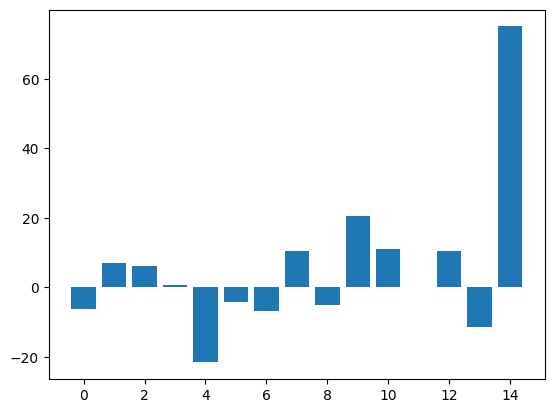

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_rating, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size', 'rating', 'grade_avg'],
      dtype='object')

4 -- clarity

7 -- colour_balance_vert

9 -- physical_balance_vert

10 -- physical_balance_hor

12 -- figure_ground_size

14 -- rating

In [ ]:
col_names_no_rating = ['temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size']

In [ ]:
X_no_rating = X_rating[col_names_no_rating]

Feature: 0, Score: -5.20839
Feature: 1, Score: 4.12202
Feature: 2, Score: -10.24602
Feature: 3, Score: 5.51592
Feature: 4, Score: 2.17938
Feature: 5, Score: -10.29131
Feature: 6, Score: -0.94119
Feature: 7, Score: 9.91355
Feature: 8, Score: -5.11785
Feature: 9, Score: 24.52828
Feature: 10, Score: 11.48398
Feature: 11, Score: 1.05611
Feature: 12, Score: 14.18346


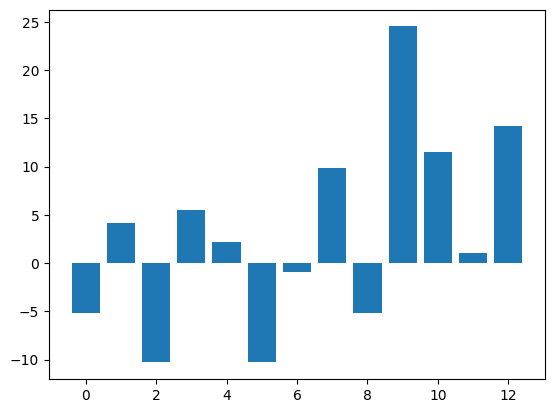

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_no_rating, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_no_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size'],
      dtype='object')

### Пьемонт

In [ ]:
scaled_features = dfp.copy()
col_names = ["rating", "grade_avg"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(5)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,-0.606032,1.096150,2.074307,0.260169,-0.204628,1.335462,1,-0.183316,0.621879,-0.906298,-0.631873,-0.986939,0.334731,-1.603541,3.25,0.394541,-2.681240
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,1.805028,1.371905,-1.102071,0.260169,-0.692759,-0.599721,1,-0.183320,-0.676696,0.033382,0.703615,0.650244,0.050721,0.567877,5.50,0.691297,-0.573530
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,-0.504319,0.721718,1.377355,-1.801905,0.365302,2.418101,1,-0.183320,1.672125,0.189338,-1.299171,-1.025974,-0.175961,0.281817,5.80,-1.237617,-1.432779
3,Buon Paggio Grignolino Piemonte 2022,https://www.vivino.com/IT/en/cantine-povero-as...,BuonPaggioGrignolinoPiemonte2022.png,https://images.vivino.com/thumbs/59Y0FaE4SAmup...,-0.431346,-0.418691,0.159804,-0.641458,-0.242116,-0.214763,1,-0.182814,2.204454,-0.688219,-0.747782,-0.595847,0.127730,0.088747,5.80,-1.237617,-1.036684
4,Contrada Maestra Barbera d'Asti 2022,https://www.vivino.com/IT/en/cantine-povero-as...,ContradaMaestraBarberad'Asti2022.png,https://images.vivino.com/thumbs/ijI9UdwYTDuLf...,-0.458128,-0.966174,0.609714,-1.438244,0.188089,-0.693112,1,-0.180789,1.733118,-0.418489,-0.374034,-0.548020,0.394513,1.068128,5.80,-1.237617,-0.836839


In [ ]:
X_rating = scaled_features[scaled_features["quality"] == 1]
X_rating.head(1)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,-0.606032,1.09615,2.074307,0.260169,-0.204628,1.335462,1,-0.183316,0.621879,-0.906298,-0.631873,-0.986939,0.334731,-1.603541,3.25,0.394541,-2.68124


In [ ]:
X_rating = X_rating[col_with_rating]
X_rating.head(1)

,temperature,saturation,brightness,contrast,clarity,colorfulness,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,rating,grade_avg
0,-0.606032,1.09615,2.074307,0.260169,-0.204628,1.335462,-0.183316,0.621879,-0.906298,-0.631873,-0.986939,0.334731,-1.603541,0.394541,-2.68124


In [ ]:
y = scaled_features[scaled_features["quality"] == 1].price
y.head(2)

0    3.25
1    5.50
Name: price, dtype: float64

In [ ]:
X_rating.shape

(5529, 15)

Feature: 0, Score: -7.34577
Feature: 1, Score: -15.28492
Feature: 2, Score: -16.71921
Feature: 3, Score: 17.61329
Feature: 4, Score: 62.02264
Feature: 5, Score: 32.05906
Feature: 6, Score: -3.86615
Feature: 7, Score: -3.42833
Feature: 8, Score: -1.43262
Feature: 9, Score: -3.73481
Feature: 10, Score: -14.48675
Feature: 11, Score: 2.36190
Feature: 12, Score: 9.43702
Feature: 13, Score: -23.73310
Feature: 14, Score: 119.65166


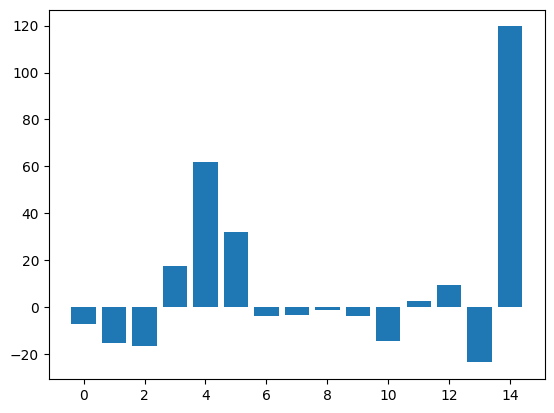

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_rating, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size', 'rating', 'grade_avg'],
      dtype='object')

4 -- clarity

7 -- colour_balance_vert

9 -- physical_balance_vert

10 -- physical_balance_hor

12 -- figure_ground_size

14 -- rating

In [ ]:
col_names_no_rating = ['temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size']

In [ ]:
X_no_rating = X_rating[col_names_no_rating]

Feature: 0, Score: -6.03290
Feature: 1, Score: -39.89705
Feature: 2, Score: -39.05277
Feature: 3, Score: 34.59622
Feature: 4, Score: 117.76801
Feature: 5, Score: 41.46870
Feature: 6, Score: -2.83782
Feature: 7, Score: 1.28969
Feature: 8, Score: 0.69676
Feature: 9, Score: 5.67701
Feature: 10, Score: -26.52918
Feature: 11, Score: 2.82835
Feature: 12, Score: 16.09301


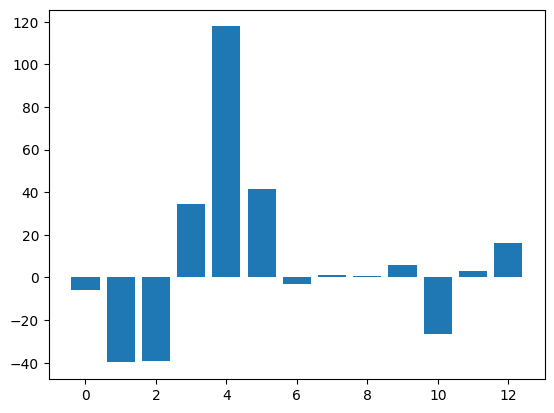

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_no_rating, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_no_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size'],
      dtype='object')

### Тоскана и Пьемонт вместе

In [3]:
frames = [dft, dfp]
df = pd.concat(frames)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_features = df.copy()
col_names = ["rating", "grade_avg"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

In [4]:
X_rating = scaled_features[scaled_features["quality"] == 1]

NameError: name 'scaled_features' is not defined

In [ ]:
X_rating = X_rating[col_with_rating]

In [ ]:
y = scaled_features[scaled_features["quality"] == 1].price

In [ ]:
X_rating.shape

(15238, 15)

Feature: 0, Score: -6.10409
Feature: 1, Score: -3.41966
Feature: 2, Score: -8.75420
Feature: 3, Score: 3.16620
Feature: 4, Score: 21.19629
Feature: 5, Score: 11.05036
Feature: 6, Score: -6.11325
Feature: 7, Score: 5.90821
Feature: 8, Score: -2.09318
Feature: 9, Score: 10.28366
Feature: 10, Score: 1.71925
Feature: 11, Score: 1.13481
Feature: 12, Score: 8.80023
Feature: 13, Score: -16.50917
Feature: 14, Score: 93.16286


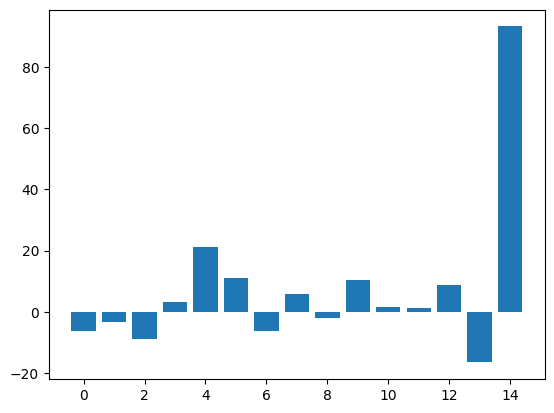

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_rating, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size', 'rating', 'grade_avg'],
      dtype='object')

4 -- clarity

7 -- colour_balance_vert

9 -- physical_balance_vert

10 -- physical_balance_hor

12 -- figure_ground_size

14 -- rating

In [ ]:
col_names_no_rating = ['temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size']

In [ ]:
X_no_rating = X_rating[col_names_no_rating]

Feature: 0, Score: -4.58426
Feature: 1, Score: -12.16538
Feature: 2, Score: -27.09182
Feature: 3, Score: 11.71759
Feature: 4, Score: 55.63703
Feature: 5, Score: 7.78091
Feature: 6, Score: -1.59510
Feature: 7, Score: 7.80426
Feature: 8, Score: -2.59733
Feature: 9, Score: 17.67199
Feature: 10, Score: -0.18569
Feature: 11, Score: 2.11135
Feature: 12, Score: 14.55895


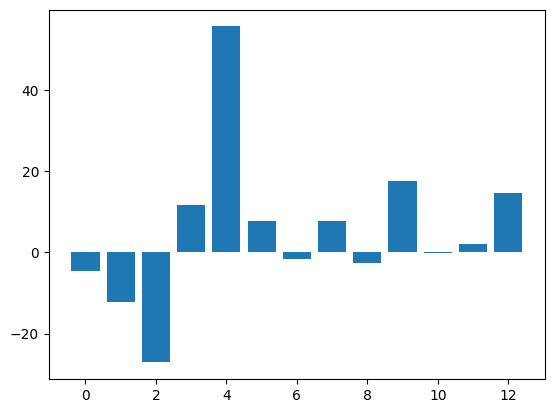

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_no_rating, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_no_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size'],
      dtype='object')

## Влияние на рейтинг

### Со шрифтами

In [ ]:
col_with_price =[
       'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'price', 'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_Poppins-Regular',
       'font_2_Rakkas-Regular', 'font_2_RobotoMono-Regular',
       'font_2_RobotoSlab-Regular', 'font_2_Rubik-Regular',
       'font_2_SpaceMono-Regular', 'font_2_Tahoma Bold',
       'font_2_Times New Roman', 'font_2_Times New Roman Italic',
       'font_2_Verdana Italic', 'font_1_ArchitectsDaughter-Regular',
       'font_1_PlayfairDisplay-Regular', 'font_2_ArchitectsDaughter-Regular',
       'font_2_Pacifico-Regular', 'num_review', 'wine_type_Dessert',
       'wine_type_Red', 'wine_type_Rose', 'wine_type_Sparkling',
       'wine_type_White', 'year', 'followers', 'following', 'user_ratings'
]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

# the result in ScaledPrice Column
df[["ScaledPrice"]] = scaler.fit_transform(
    df[["price"]])

In [ ]:
X_pr = df[df["quality"] == 1]
X_pr.head(1)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,followers,following,user_ratings,font_1_ArchitectsDaughter-Regular,font_1_PlayfairDisplay-Regular,font_2_ArchitectsDaughter-Regular,font_2_Pacifico-Regular,ScaledPrice,ScaledRating,ScaledGrade
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.12176,0.266658,0.64682,-0.679265,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.032943,0.0,0.588438


In [ ]:
X_pr = X_pr[col_with_price]

In [ ]:
X_pr.head(3)

,temperature,saturation,brightness,contrast,clarity,colorfulness,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,...,font_2_Rubik-Regular,font_2_SpaceMono-Regular,font_2_Tahoma Bold,font_2_Times New Roman,font_2_Times New Roman Italic,font_2_Verdana Italic,font_1_ArchitectsDaughter-Regular,font_1_PlayfairDisplay-Regular,font_2_ArchitectsDaughter-Regular,font_2_Pacifico-Regular
0,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,-0.180086,1.062009,-0.292457,0.214080,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,-0.180082,-0.688356,-0.770617,0.806691,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
2,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,-0.179059,0.007237,-0.165836,0.508883,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_pr = X_pr.fillna(0)

In [ ]:
y = df[df["quality"] == 1].grade_avg

Feature: 0, Score: 0.00565
Feature: 1, Score: -0.02011
Feature: 2, Score: -0.03064
Feature: 3, Score: 0.01510
Feature: 4, Score: 0.09704
Feature: 5, Score: -0.00670
Feature: 6, Score: 0.01109
Feature: 7, Score: -0.00094
Feature: 8, Score: -0.00567
Feature: 9, Score: 0.01918
Feature: 10, Score: -0.00034
Feature: 11, Score: 0.00237
Feature: 12, Score: 0.00524
Feature: 13, Score: 0.00014
Feature: 14, Score: -0.01963
Feature: 15, Score: -0.05805
Feature: 16, Score: -0.07125
Feature: 17, Score: -0.17777
Feature: 18, Score: 0.16863
Feature: 19, Score: 0.03172
Feature: 20, Score: -0.01818
Feature: 21, Score: 0.01639
Feature: 22, Score: -0.04813
Feature: 23, Score: -0.16279
Feature: 24, Score: 0.04858
Feature: 25, Score: 0.05029
Feature: 26, Score: 0.28045
Feature: 27, Score: 0.06119
Feature: 28, Score: 0.08031
Feature: 29, Score: 0.18494
Feature: 30, Score: -0.17547
Feature: 31, Score: 0.06407
Feature: 32, Score: 0.00308
Feature: 33, Score: 0.00032
Feature: 34, Score: -0.31261
Feature: 35, Sc

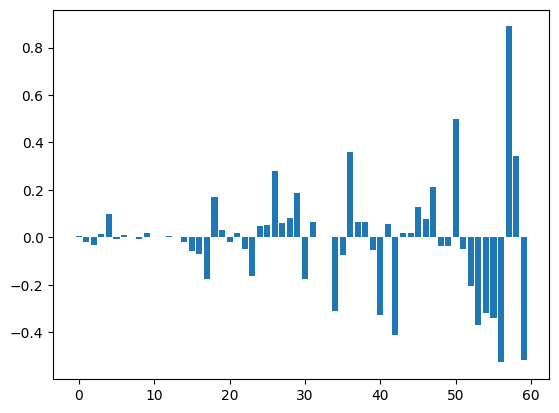

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_pr, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
coef_series = pd.Series(
  data=model.coef_,
  index=model.feature_names_in_
)

print(coef_series)


temperature                          0.005653
saturation                          -0.020115
brightness                          -0.030643
contrast                             0.015105
clarity                              0.097039
colorfulness                        -0.006696
rule_of_thirds                       0.011088
colour_balance_vert                 -0.000936
colour_balance_hor                  -0.005668
physical_balance_vert                0.019183
physical_balance_hor                -0.000338
diagonal_dominance                   0.002371
figure_ground_size                   0.005235
price                                0.000143
font_1_ALfaSlabOne-Regular          -0.019631
font_1_Arial Black                  -0.058048
font_1_Bangers-Regular              -0.071249
font_1_Courier                      -0.177773
font_1_Lora-regular                  0.168633
font_1_Niconne-Regular               0.031717
font_1_OpenSans-Light               -0.018179
font_1_RobotoMono-Regular         

In [ ]:
print(coef_series.sort_values())

year                                -0.528040
user_ratings                        -0.517690
font_2_Tahoma Bold                  -0.410926
wine_type_Rose                      -0.368344
wine_type_White                     -0.342257
font_2_Rubik-Regular                -0.329803
wine_type_Sparkling                 -0.319171
font_2_OpenSans-Light               -0.312614
wine_type_Red                       -0.204576
font_1_Courier                      -0.177773
font_2_Courier                      -0.175475
font_1_Times New Roman              -0.162788
font_2_PlayfairDisplay-Regular      -0.076341
font_1_Bangers-Regular              -0.071249
font_1_Arial Black                  -0.058048
font_2_RobotoSlab-Regular           -0.053499
wine_type_Dessert                   -0.049635
font_1_SpaceMono-Regular            -0.048133
font_2_Pacifico-Regular             -0.038210
font_2_ArchitectsDaughter-Regular   -0.035364
brightness                          -0.030643
saturation                        

In [ ]:
plot_data = coef_series.sort_values()

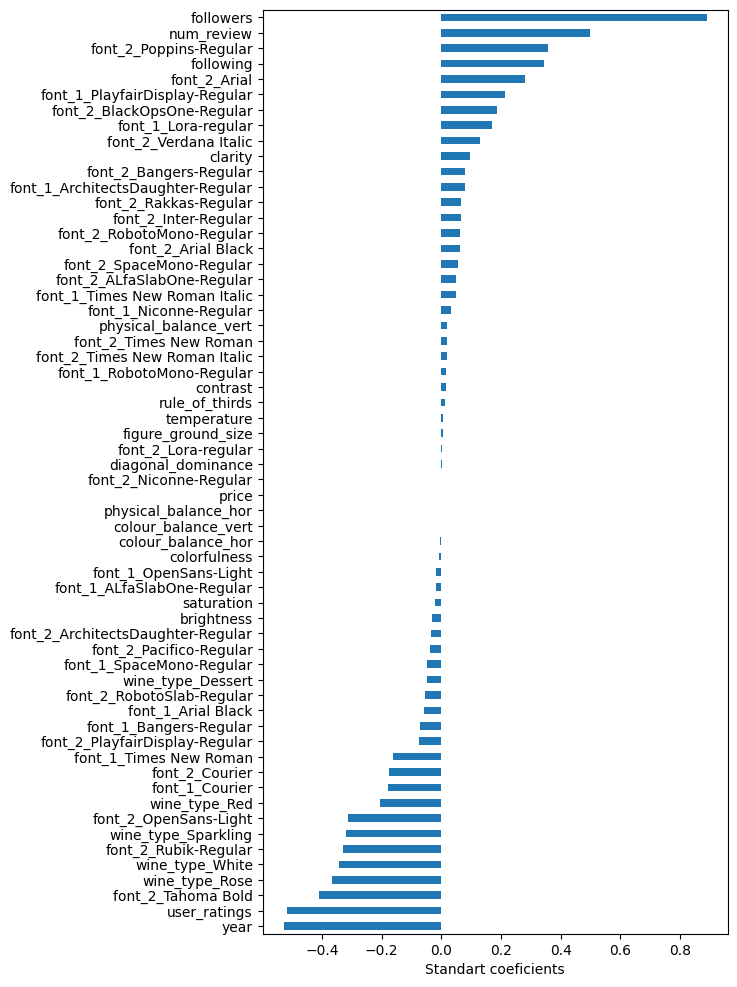

In [ ]:
fig, ax = plt.subplots(figsize = (6,12))
plot_data.plot(kind='barh')

ax.set_xlabel("Standart coeficients")

fig.savefig('Standart coeficients.png', dpi=fig.dpi, bbox_inches="tight")

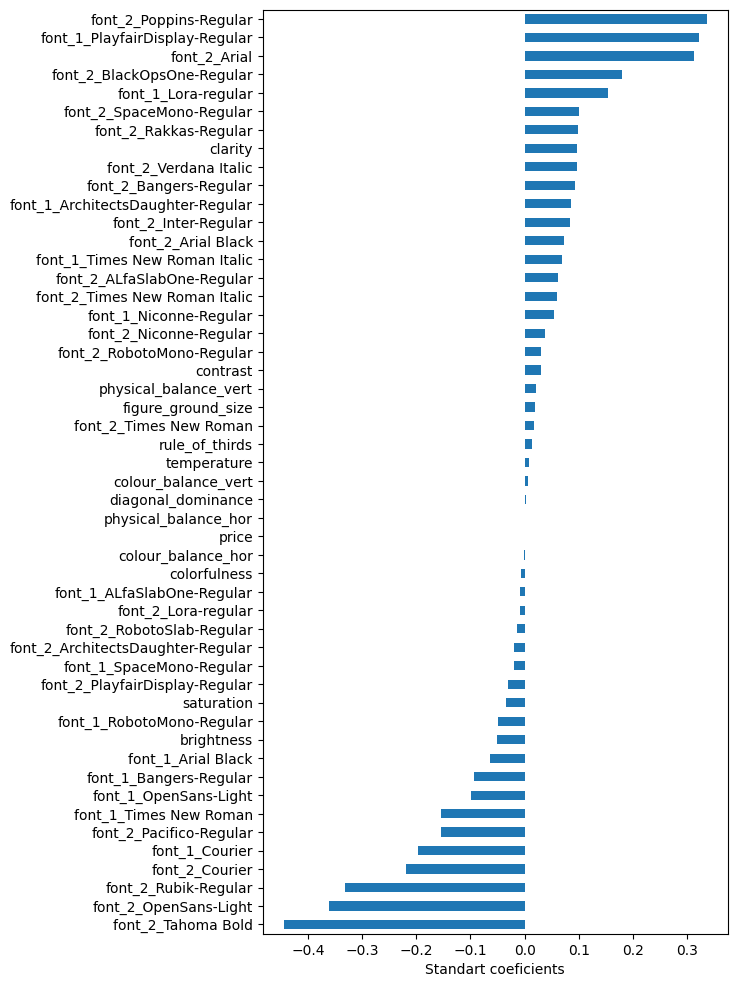

In [ ]:
fig, ax = plt.subplots(figsize = (6,12))
plot_data.plot(kind='barh')

ax.set_xlabel("Standart coeficients")

fig.savefig('Standart coeficients.png', dpi=fig.dpi, bbox_inches="tight")

### Тоскана

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_features = dft.copy()
col_names = ["price"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(5)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,1,-0.180086,1.062009,-0.292457,0.214080,0.422017,-0.356926,-1.749009,3.464927,0.0,4.028714
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,1,-0.180082,-0.688356,-0.770617,0.806691,-0.014314,1.626523,0.920636,3.870662,4.7,4.386521
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,1,-0.179059,0.007237,-0.165836,0.508883,0.991805,0.640993,-1.837117,2.580909,4.7,4.678044
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,1,-0.179059,0.007237,-0.165836,0.508883,0.991805,0.640993,-1.837117,2.795331,4.7,4.680965
4,Brunello di Montalcino 2006,https://www.vivino.com/IT/en/poggio-di-sotto-b...,https://images.vivino.com/thumbs/84Zp5lVOQ7mAU...,BrunellodiMontalcino2006.png,-0.214025,1.509953,-2.001714,0.266658,-0.787889,-0.844076,1,-0.180086,-0.362004,0.230524,3.807146,-0.799570,-0.567337,-1.944915,4.214596,4.6,4.236527


In [ ]:
# scaled_features = scaled_features[scaled_features["quality"] == 1]
scaled_features.quality.head(2)

0    1
1    1
Name: quality, dtype: int64

In [ ]:
col_with_price =[
    'temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', "price"
]

In [ ]:
X_price = scaled_features[scaled_features["quality"] == 1]
X_price.head(1)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.12176,0.266658,0.64682,-0.679265,1,-0.180086,1.062009,-0.292457,0.21408,0.422017,-0.356926,-1.749009,3.464927,0.0,4.028714


In [ ]:
X_price = X_price[col_with_price]

In [ ]:
y = scaled_features[scaled_features["quality"] == 1].grade_avg

In [ ]:
X_price.shape

(9709, 14)

Feature: 0, Score: 0.00755
Feature: 1, Score: -0.01723
Feature: 2, Score: -0.06208
Feature: 3, Score: 0.01951
Feature: 4, Score: 0.09362
Feature: 5, Score: -0.01854
Feature: 6, Score: 0.02099
Feature: 7, Score: -0.00829
Feature: 8, Score: -0.00030
Feature: 9, Score: 0.00011
Feature: 10, Score: -0.00199
Feature: 11, Score: 0.00392
Feature: 12, Score: 0.00957
Feature: 13, Score: 0.09983


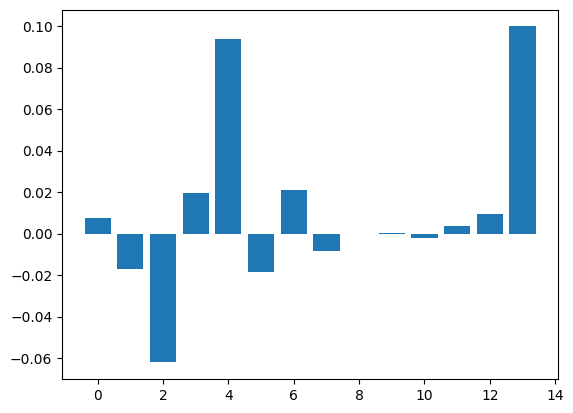

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_price, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_price.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size', 'price'],
      dtype='object')

4 -- clarity

7 -- colour_balance_vert

9 -- physical_balance_vert

10 -- physical_balance_hor

12 -- figure_ground_size

14 -- rating

In [ ]:
col_names_no_price = ['temperature','saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size']

In [ ]:
X_no_price = X_price[col_names_no_rating]

Feature: 0, Score: 0.00476
Feature: 1, Score: -0.01502
Feature: 2, Score: -0.06758
Feature: 3, Score: 0.02247
Feature: 4, Score: 0.09479
Feature: 5, Score: -0.02406
Feature: 6, Score: 0.02049
Feature: 7, Score: -0.00298
Feature: 8, Score: -0.00305
Feature: 9, Score: 0.01327
Feature: 10, Score: 0.00417
Feature: 11, Score: 0.00448
Feature: 12, Score: 0.01718


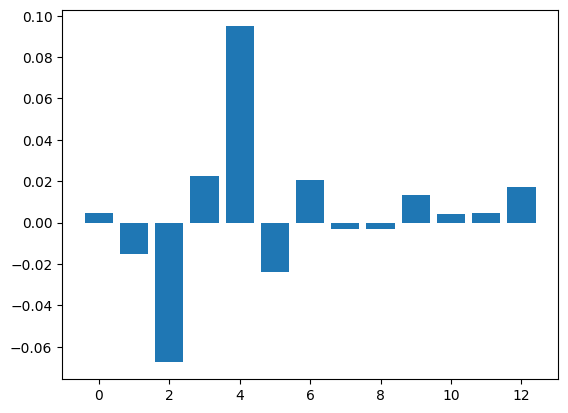

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_no_price, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_no_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size'],
      dtype='object')

### Пьемонт

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_features = dfp.copy()
col_names = ["price"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

In [ ]:
X_price = scaled_features[scaled_features["quality"] == 1]

In [ ]:
X_price = X_price[col_with_price]

In [ ]:
y = scaled_features[scaled_features["quality"] == 1].grade_avg

In [ ]:
X_price.shape

(5529, 14)

Feature: 0, Score: 0.00245
Feature: 1, Score: -0.06040
Feature: 2, Score: -0.04978
Feature: 3, Score: 0.04343
Feature: 4, Score: 0.11711
Feature: 5, Score: 0.01775
Feature: 6, Score: 0.00273
Feature: 7, Score: 0.01374
Feature: 8, Score: 0.00732
Feature: 9, Score: 0.02209
Feature: 10, Score: -0.02275
Feature: 11, Score: -0.00006
Feature: 12, Score: 0.01950
Feature: 13, Score: 0.05369


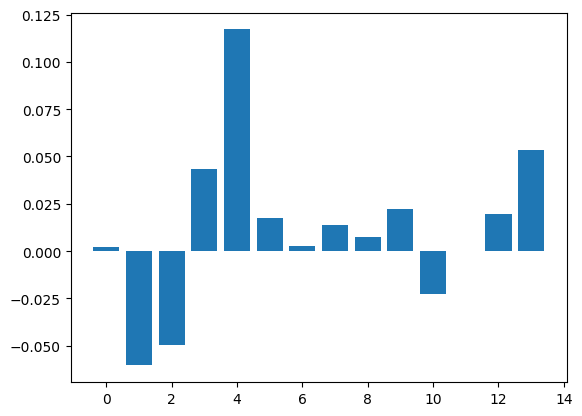

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_price, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_price.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size', 'price'],
      dtype='object')

4 -- clarity

7 -- colour_balance_vert

9 -- physical_balance_vert

10 -- physical_balance_hor

12 -- figure_ground_size

14 -- rating

In [ ]:
X_no_price = X_price[col_names_no_rating]

Feature: 0, Score: 0.00181
Feature: 1, Score: -0.06460
Feature: 2, Score: -0.05389
Feature: 3, Score: 0.04707
Feature: 4, Score: 0.12950
Feature: 5, Score: 0.02211
Feature: 6, Score: 0.00243
Feature: 7, Score: 0.01387
Feature: 8, Score: 0.00739
Feature: 9, Score: 0.02269
Feature: 10, Score: -0.02554
Feature: 11, Score: 0.00024
Feature: 12, Score: 0.02119


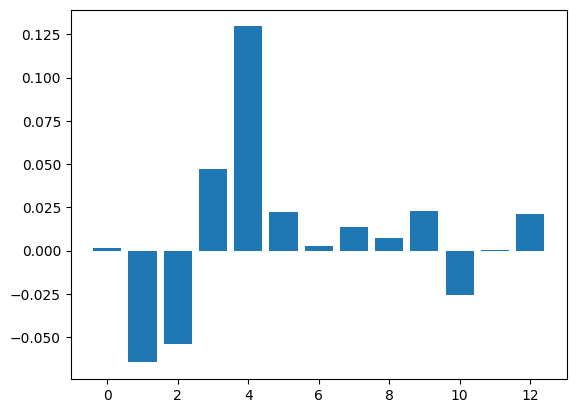

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_no_price, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_no_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size'],
      dtype='object')

### Тоскана и Пьемонт вместе

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_features = df.copy()
col_names = ["price"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(5)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,1,-0.180086,1.062009,-0.292457,0.214080,0.422017,-0.356926,-1.749009,1.833697,0.0,4.028714
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,1,-0.180082,-0.688356,-0.770617,0.806691,-0.014314,1.626523,0.920636,2.054276,4.7,4.386521
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,1,-0.179059,0.007237,-0.165836,0.508883,0.991805,0.640993,-1.837117,1.353100,4.7,4.678044
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,1,-0.179059,0.007237,-0.165836,0.508883,0.991805,0.640993,-1.837117,1.469670,4.7,4.680965
4,Brunello di Montalcino 2006,https://www.vivino.com/IT/en/poggio-di-sotto-b...,https://images.vivino.com/thumbs/84Zp5lVOQ7mAU...,BrunellodiMontalcino2006.png,-0.214025,1.509953,-2.001714,0.266658,-0.787889,-0.844076,1,-0.180086,-0.362004,0.230524,3.807146,-0.799570,-0.567337,-1.944915,2.241256,4.6,4.236527


In [ ]:
X_price = scaled_features[scaled_features["quality"] == 1]

In [ ]:
X_price = X_price[col_with_price]

In [ ]:
y = scaled_features[scaled_features["quality"] == 1].grade_avg

In [ ]:
X_price.shape

(15238, 14)

Feature: 0, Score: 0.00599
Feature: 1, Score: -0.03049
Feature: 2, Score: -0.05424
Feature: 3, Score: 0.02961
Feature: 4, Score: 0.09717
Feature: 5, Score: -0.01177
Feature: 6, Score: 0.01285
Feature: 7, Score: 0.00500
Feature: 8, Score: -0.00239
Feature: 9, Score: 0.01923
Feature: 10, Score: -0.00273
Feature: 11, Score: 0.00292
Feature: 12, Score: 0.01913
Feature: 13, Score: 0.06527


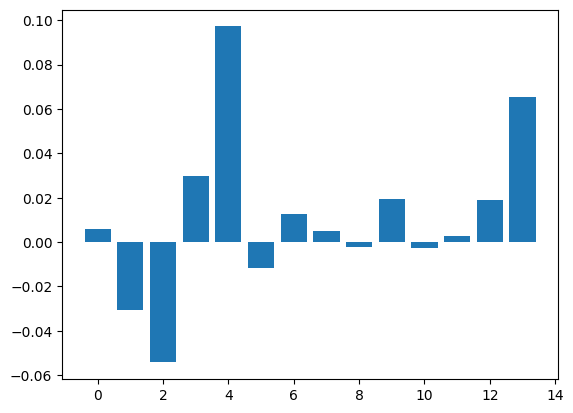

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_price, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_price.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size', 'price'],
      dtype='object')

4 -- clarity

7 -- colour_balance_vert

9 -- physical_balance_vert

10 -- physical_balance_hor

12 -- figure_ground_size

14 -- rating

In [ ]:
X_no_price = X_price[col_names_no_rating]

Feature: 0, Score: 0.00511
Feature: 1, Score: -0.03281
Feature: 2, Score: -0.05941
Feature: 3, Score: 0.03184
Feature: 4, Score: 0.10778
Feature: 5, Score: -0.01028
Feature: 6, Score: 0.01254
Feature: 7, Score: 0.00649
Feature: 8, Score: -0.00289
Feature: 9, Score: 0.02260
Feature: 10, Score: -0.00276
Feature: 11, Score: 0.00332
Feature: 12, Score: 0.02191


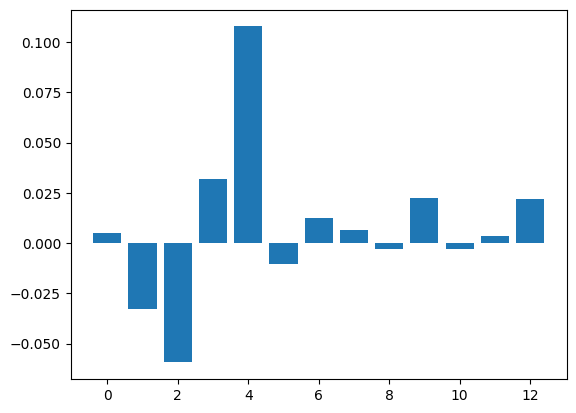

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_no_price, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_no_rating.columns

Index(['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert', 'colour_balance_hor', 'physical_balance_vert',
       'physical_balance_hor', 'diagonal_dominance', 'figure_ground_size'],
      dtype='object')

# Statsmodels

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
X = dft[col_with_rating]
y = dft.price
f1 = 'y ~ temperature+saturation+brightness+contrast+clarity+colorfulness+rule_of_thirds+colour_balance_vert+colour_balance_hor+physical_balance_vert+physical_balance_hor+diagonal_dominance+figure_ground_size+rating+grade_avg'

# Fit regression model (using the natural log of one of the regressors)
model = smf.ols(formula=f1, data=dft).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:13:52   Log-Likelihood:                -68185.
No. Observations:               10394   AIC:                         1.364e+05
Df Residuals:                   10378   BIC:                         1.365e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -847.57

In [ ]:
model.pvalues

Intercept                3.279474e-255
temperature               2.310671e-03
saturation                8.420029e-02
brightness                2.827882e-01
contrast                  2.211729e-01
clarity                   1.080116e-01
colorfulness              2.413566e-01
rule_of_thirds            5.811358e-03
colour_balance_vert       5.219854e-04
colour_balance_hor        2.967482e-01
physical_balance_vert     1.245958e-23
physical_balance_hor      7.742628e-06
diagonal_dominance        8.001420e-01
figure_ground_size        6.055075e-06
rating                    3.947425e-07
grade_avg                2.081293e-299
dtype: float64

# После добавления шрифтов

In [ ]:
df = pd.concat([dft, dfp], axis=0, join='outer').fillna(0)
df.head(2)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,wine_type_Sparkling,wine_type_White,year,followers,following,user_ratings,font_1_ArchitectsDaughter-Regular,font_1_PlayfairDisplay-Regular,font_2_ArchitectsDaughter-Regular,font_2_Pacifico-Regular
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,0,0,0.670886,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,0,0,0.822785,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['Wine', 'link', 'image_link', 'image_names', 'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'quality', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'price', 'rating',
       'grade_avg', 'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_P

In [ ]:
col_with_rating =[
       'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', #'rating',
       'grade_avg', 'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_Poppins-Regular',
       'font_2_Rakkas-Regular', 'font_2_RobotoMono-Regular',
       'font_2_RobotoSlab-Regular', 'font_2_Rubik-Regular',
       'font_2_SpaceMono-Regular', 'font_2_Tahoma Bold',
       'font_2_Times New Roman', 'font_2_Times New Roman Italic',
       'font_2_Verdana Italic', 'font_1_ArchitectsDaughter-Regular',
       'font_1_PlayfairDisplay-Regular', 'font_2_ArchitectsDaughter-Regular',
       'font_2_Pacifico-Regular', 'num_review', 'wine_type_Dessert',
       'wine_type_Red', 'wine_type_Rose', 'wine_type_Sparkling',
       'wine_type_White', 'year', 'followers', 'following', 'user_ratings'
]

In [ ]:
col_with_rating_no_fonts =[
       'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', #'rating',
       'grade_avg', 'num_review', 'wine_type_Dessert',
       'wine_type_Red', 'wine_type_Rose', 'wine_type_Sparkling',
       'wine_type_White', 'year', 'followers', 'following', 'user_ratings'
]

In [ ]:
  gr_list = df.grade_avg.to_list()

In [ ]:
lmin = min(gr_list)
lmax = max(gr_list)
for i in range(len(gr_list)):
  gr_list[i] = (gr_list[i] - lmin)/(lmax - lmin)
max(gr_list)

1.0

In [ ]:
df.grade_avg = gr_list

In [ ]:
scaled_features = df.copy()
col_names = ["rating", "grade_avg"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

NameError: name 'StandardScaler' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

# the result in ScaledPrice Column
df[["ScaledRating", "ScaledGrade"]] = scaler.fit_transform(
    df[["rating", "grade_avg"]])

In [ ]:
X_rating = df[df["quality"] == 1]
X_rating.head(5)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,wine_type_Sparkling,wine_type_White,year,followers,following,user_ratings,font_1_ArchitectsDaughter-Regular,font_1_PlayfairDisplay-Regular,font_2_ArchitectsDaughter-Regular,font_2_Pacifico-Regular
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,0,0,0.670886,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,0,0,0.822785,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,...,0,0,0.772152,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,Tenuta Tignanello 'Solaia' 1997,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'1997.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,...,0,0,0.658228,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,Brunello di Montalcino 2006,https://www.vivino.com/IT/en/poggio-di-sotto-b...,https://images.vivino.com/thumbs/84Zp5lVOQ7mAU...,BrunellodiMontalcino2006.png,-0.214025,1.509953,-2.001714,0.266658,-0.787889,-0.844076,...,0,0,0.772152,0.066023,0.013003,0.235543,0.0,0.0,0.0,0.0


In [ ]:
X_rating = X_rating.fillna(0)

In [ ]:
X_rating = X_rating[col_with_rating]

In [ ]:
df['logprice'] = np.log2(df['price'])

In [ ]:
y = df[df["quality"] == 1].logprice

In [ ]:
y_pr = df[df["quality"] == 1].price

In [ ]:
y[:10]

0     9.500842
1     9.643856
2     9.129283
3     9.228578
4     9.754888
5     9.409391
6    10.103288
7     9.696516
8    10.541097
9    12.545930
Name: logprice, dtype: float64

Feature: 0, Score: -6.22457
Feature: 1, Score: 4.61140
Feature: 2, Score: -3.00838
Feature: 3, Score: 0.68335
Feature: 4, Score: 28.36258
Feature: 5, Score: 9.59155
Feature: 6, Score: -4.53881
Feature: 7, Score: 1.27848
Feature: 8, Score: -4.01254
Feature: 9, Score: 10.31589
Feature: 10, Score: 0.44351
Feature: 11, Score: -0.42319
Feature: 12, Score: 2.95987
Feature: 13, Score: 617.38646
Feature: 14, Score: -542035721223069.43750
Feature: 15, Score: -542035721223077.06250
Feature: 16, Score: -542035721223053.00000
Feature: 17, Score: -542035721223034.12500
Feature: 18, Score: -542035721223106.68750
Feature: 19, Score: -542035721223119.81250
Feature: 20, Score: -542035721223086.43750
Feature: 21, Score: -542035721223055.62500
Feature: 22, Score: -542035721223074.56250
Feature: 23, Score: -542035721223083.12500
Feature: 24, Score: -542035721223101.50000
Feature: 25, Score: 711600178804476.87500
Feature: 26, Score: 711600178804401.62500
Feature: 27, Score: 711600178804470.87500
Feature: 2

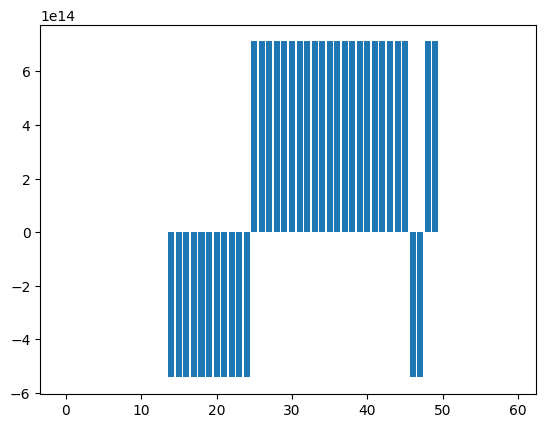

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_rating, y_pr)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
coef_series = pd.Series(
  data=model.coef_,
  index=model.feature_names_in_
)

print(coef_series)


temperature                         -6.224572e+00
saturation                           4.611396e+00
brightness                          -3.008381e+00
contrast                             6.833516e-01
clarity                              2.836258e+01
colorfulness                         9.591549e+00
rule_of_thirds                      -4.538811e+00
colour_balance_vert                  1.278476e+00
colour_balance_hor                  -4.012544e+00
physical_balance_vert                1.031589e+01
physical_balance_hor                 4.435149e-01
diagonal_dominance                  -4.231859e-01
figure_ground_size                   2.959866e+00
grade_avg                            6.173865e+02
font_1_ALfaSlabOne-Regular          -5.420357e+14
font_1_Arial Black                  -5.420357e+14
font_1_Bangers-Regular              -5.420357e+14
font_1_Courier                      -5.420357e+14
font_1_Lora-regular                 -5.420357e+14
font_1_Niconne-Regular              -5.420357e+14


In [ ]:
print(coef_series.sort_values())

font_1_Niconne-Regular              -5.420357e+14
font_1_ArchitectsDaughter-Regular   -5.420357e+14
font_1_PlayfairDisplay-Regular      -5.420357e+14
font_1_Lora-regular                 -5.420357e+14
font_1_Times New Roman Italic       -5.420357e+14
font_1_OpenSans-Light               -5.420357e+14
font_1_Times New Roman              -5.420357e+14
font_1_Arial Black                  -5.420357e+14
font_1_SpaceMono-Regular            -5.420357e+14
font_1_ALfaSlabOne-Regular          -5.420357e+14
font_1_RobotoMono-Regular           -5.420357e+14
font_1_Bangers-Regular              -5.420357e+14
font_1_Courier                      -5.420357e+14
year                                -2.877500e+02
num_review                          -2.664375e+02
user_ratings                        -2.700000e+01
temperature                         -6.224572e+00
rule_of_thirds                      -4.538811e+00
colour_balance_hor                  -4.012544e+00
brightness                          -3.008381e+00


In [ ]:
plot_data = coef_series.sort_values()

In [ ]:
plot_data

In [ ]:
plot_data

font_1_Niconne-Regular              -5.420357e+14
font_1_ArchitectsDaughter-Regular   -5.420357e+14
font_1_PlayfairDisplay-Regular      -5.420357e+14
font_1_Lora-regular                 -5.420357e+14
font_1_Times New Roman Italic       -5.420357e+14
font_1_OpenSans-Light               -5.420357e+14
font_1_Times New Roman              -5.420357e+14
font_1_Arial Black                  -5.420357e+14
font_1_SpaceMono-Regular            -5.420357e+14
font_1_ALfaSlabOne-Regular          -5.420357e+14
font_1_RobotoMono-Regular           -5.420357e+14
font_1_Bangers-Regular              -5.420357e+14
font_1_Courier                      -5.420357e+14
year                                -2.877500e+02
num_review                          -2.664375e+02
user_ratings                        -2.700000e+01
temperature                         -6.224572e+00
rule_of_thirds                      -4.538811e+00
colour_balance_hor                  -4.012544e+00
brightness                          -3.008381e+00


In [ ]:
plot_data[0] = 802.3220/2
plot_data[1] = 756.9075/2
plot_data[2] = 730.5025/2
plot_data[3] = 802.5333/2
plot_data[4] = 789.4654/2
plot_data[5] = 740.6306/2
plot_data[6] = 755.8692/2
plot_data[7] = 762.5492/2
plot_data[8] = 760.3889/2
plot_data[9] = 733.7552/2
plot_data[10] = 757.1982/2
plot_data[11] = 748.5781/2
plot_data[12] = 807.8985/2
plot_data[37] = -547.1916/2
plot_data[38] = -462.2651/2
plot_data[39] = -409.6797/2
plot_data[40] = -469.7741/2
plot_data[41] = -501.6856/2
plot_data[42] = -447.0521/2
plot_data[43] = -451.7614/2
plot_data[44] = -428.3556/2
plot_data[45] = -434.9699/2
plot_data[46] = -438.0721/2
plot_data[47] = -413.4878/2
plot_data[48] = -418.3420/2
plot_data[49] = -456.6556/2
plot_data[50] = -443.6481/2
plot_data[51] = -402.8718/2
plot_data[52] = -400.6111/2
plot_data[53] = -474.5421/2
plot_data[54] = -408.9429/2
plot_data[55] = -457.1323/2
plot_data[56] = -401.2855/2
plot_data[57] = -363.5793/2
plot_data[58] = -356.0541/2
plot_data[59] = -408.9429/2
plot_data[54] = -360.6390/2






In [ ]:
plot_data = plot_data.sort_values()

In [ ]:
plot_data

font_1_Niconne-Regular              -401.161000
font_1_ArchitectsDaughter-Regular   -378.453750
font_1_PlayfairDisplay-Regular      -365.251250
font_1_Lora-regular                 -401.266650
font_1_Times New Roman Italic       -394.732700
font_1_OpenSans-Light               -370.315300
font_1_Times New Roman              -377.934600
font_1_Arial Black                  -381.274600
font_1_SpaceMono-Regular            -380.194450
font_1_ALfaSlabOne-Regular          -366.877600
font_1_RobotoMono-Regular           -378.599100
font_1_Bangers-Regular              -374.289050
font_1_Courier                      -403.949250
year                                -287.750000
num_review                          -266.437500
user_ratings                         -27.000000
temperature                           -6.224572
rule_of_thirds                        -4.538811
colour_balance_hor                    -4.012544
brightness                            -3.008381
diagonal_dominance                    -0

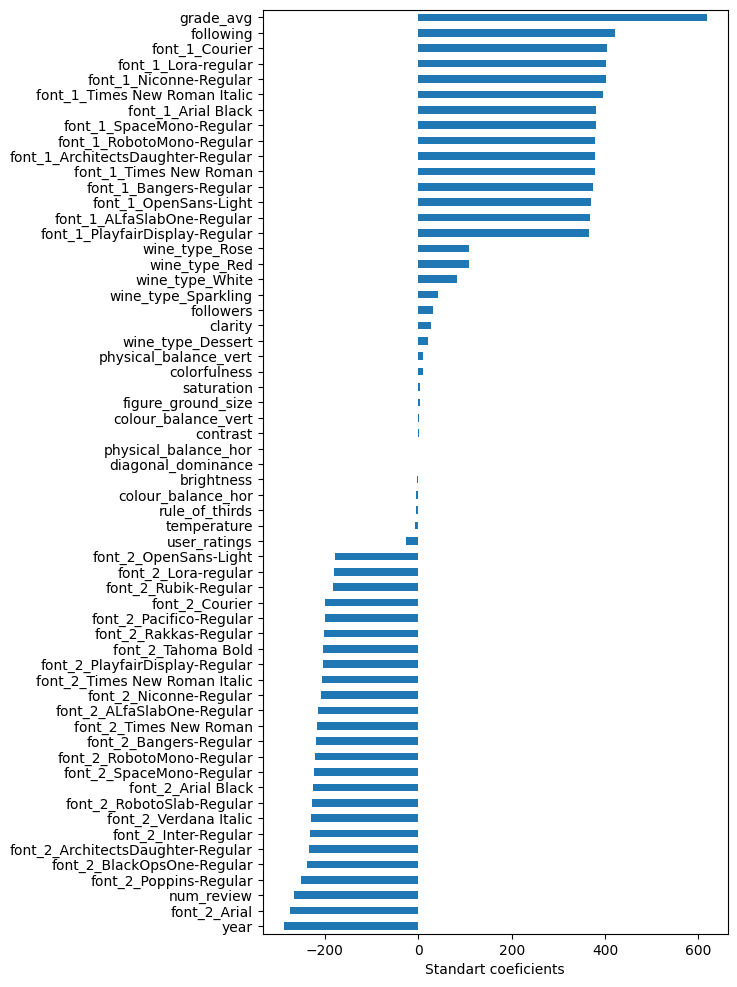

In [ ]:
fig, ax = plt.subplots(figsize = (6,12))
plot_data.plot(kind='barh')

ax.set_xlabel("Standart coeficients")

fig.savefig('Standart coeficients.png', dpi=fig.dpi, bbox_inches="tight")

In [ ]:
plot_data[1]

-542035721223118.5

In [ ]:
X_rating = df[df["quality"] == 1]

In [ ]:
y = df[df["quality"] == 1].logprice

In [ ]:
X_rating = X_rating[col_with_rating_no_fonts].fillna(0)

Feature: 0, Score: -5.75384
Feature: 1, Score: 2.71669
Feature: 2, Score: -4.19913
Feature: 3, Score: 0.68298
Feature: 4, Score: 30.09688
Feature: 5, Score: 11.22869
Feature: 6, Score: -3.83571
Feature: 7, Score: 1.47681
Feature: 8, Score: -4.22030
Feature: 9, Score: 9.80883
Feature: 10, Score: 1.24982
Feature: 11, Score: -0.01580
Feature: 12, Score: 3.68364
Feature: 13, Score: 253.19288
Feature: 14, Score: -260.84038
Feature: 15, Score: 48.19153
Feature: 16, Score: 138.31993
Feature: 17, Score: 137.16844
Feature: 18, Score: 73.75693
Feature: 19, Score: 110.22593
Feature: 20, Score: -276.80268
Feature: 21, Score: 30.10031
Feature: 22, Score: 432.24021
Feature: 23, Score: -30.01148


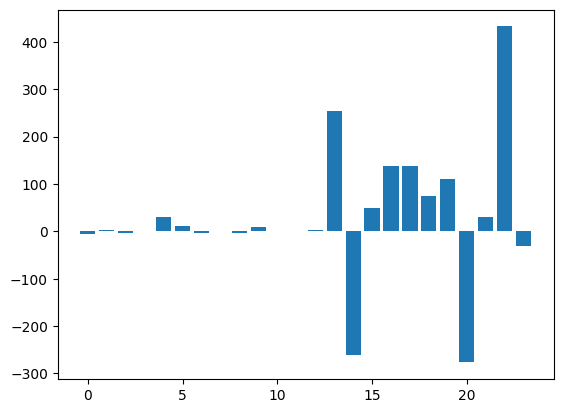

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_rating, y_pr)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
coef_series = pd.Series(
  data=model.coef_,
  index=model.feature_names_in_
)

print(coef_series)


temperature               -5.753836
saturation                 2.716687
brightness                -4.199128
contrast                   0.682985
clarity                   30.096881
colorfulness              11.228690
rule_of_thirds            -3.835710
colour_balance_vert        1.476809
colour_balance_hor        -4.220305
physical_balance_vert      9.808834
physical_balance_hor       1.249821
diagonal_dominance        -0.015803
figure_ground_size         3.683641
grade_avg                253.192885
num_review              -260.840379
wine_type_Dessert         48.191531
wine_type_Red            138.319933
wine_type_Rose           137.168441
wine_type_Sparkling       73.756930
wine_type_White          110.225930
year                    -276.802676
followers                 30.100307
following                432.240215
user_ratings             -30.011479
dtype: float64


In [ ]:
print(coef_series.sort_values())

year                    -276.802676
num_review              -260.840379
user_ratings             -30.011479
temperature               -5.753836
colour_balance_hor        -4.220305
brightness                -4.199128
rule_of_thirds            -3.835710
diagonal_dominance        -0.015803
contrast                   0.682985
physical_balance_hor       1.249821
colour_balance_vert        1.476809
saturation                 2.716687
figure_ground_size         3.683641
physical_balance_vert      9.808834
colorfulness              11.228690
clarity                   30.096881
followers                 30.100307
wine_type_Dessert         48.191531
wine_type_Sparkling       73.756930
wine_type_White          110.225930
wine_type_Rose           137.168441
wine_type_Red            138.319933
grade_avg                253.192885
following                432.240215
dtype: float64


In [ ]:
plot_data = coef_series.sort_values()

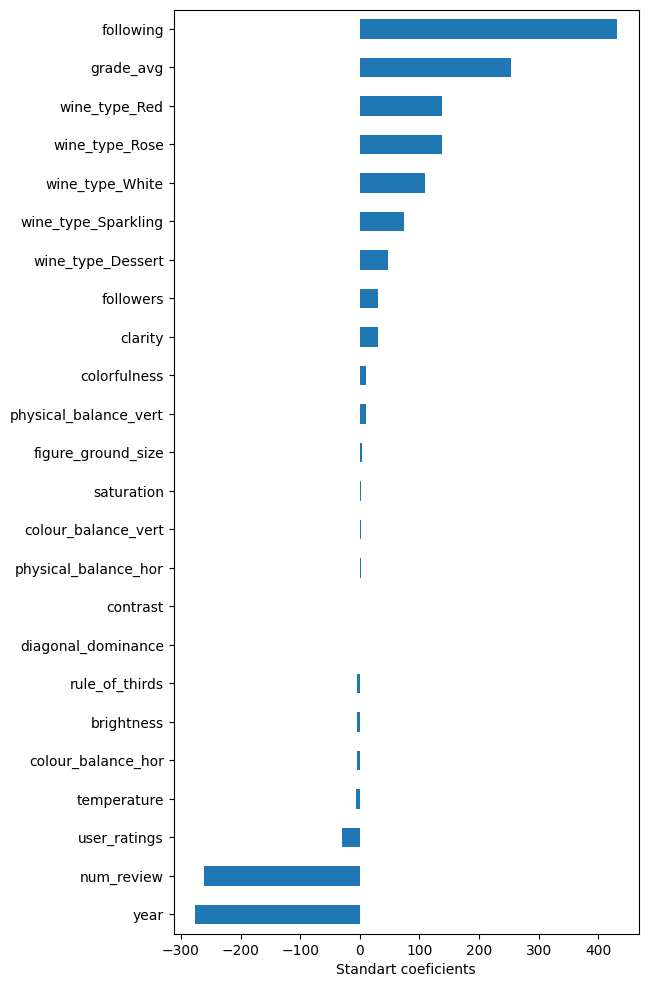

In [ ]:
fig, ax = plt.subplots(figsize = (6,12))
plot_data.plot(kind='barh')

ax.set_xlabel("Standart coeficients")

fig.savefig('Standart coeficients.png', dpi=fig.dpi, bbox_inches="tight")

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = sm.OLS(y, X_rating)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     23.44
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          3.68e-200
Time:                        12:33:36   Log-Likelihood:            -1.1029e+05
No. Observations:               15238   AIC:                         2.207e+05
Df Residuals:                   15188   BIC:                         2.211e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
temper

In [ ]:
plot_data = coef_series.sort_values()

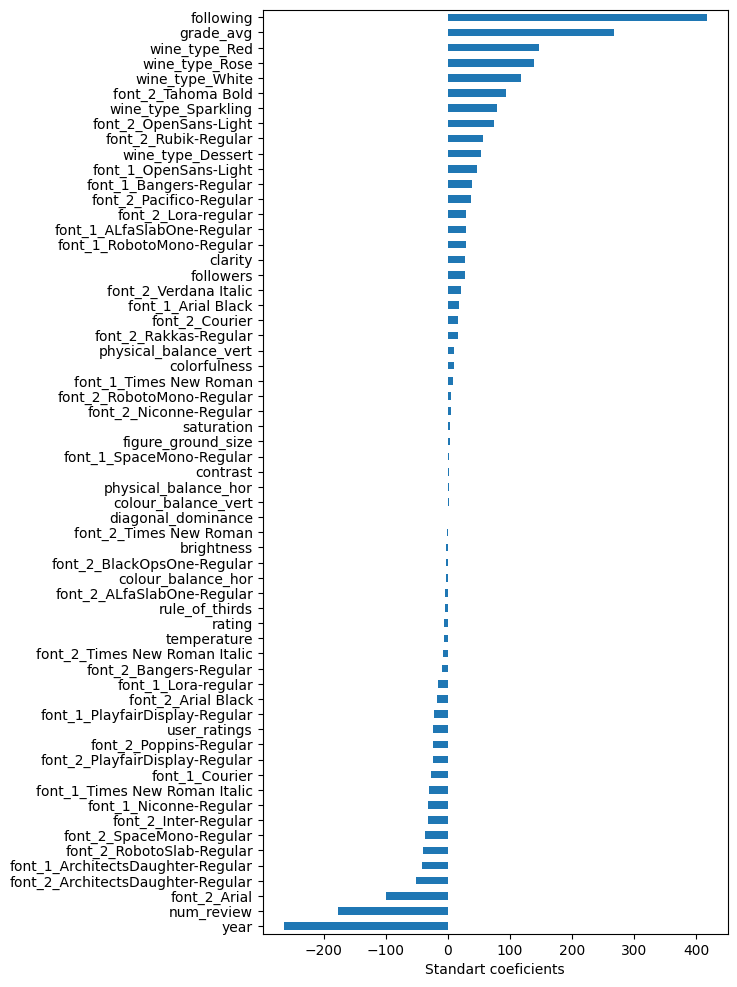

In [ ]:
fig, ax = plt.subplots(figsize = (6,12))
plot_data.plot(kind='barh')

ax.set_xlabel("Standart coeficients")

fig.savefig('Standart coeficients.png', dpi=fig.dpi, bbox_inches="tight")

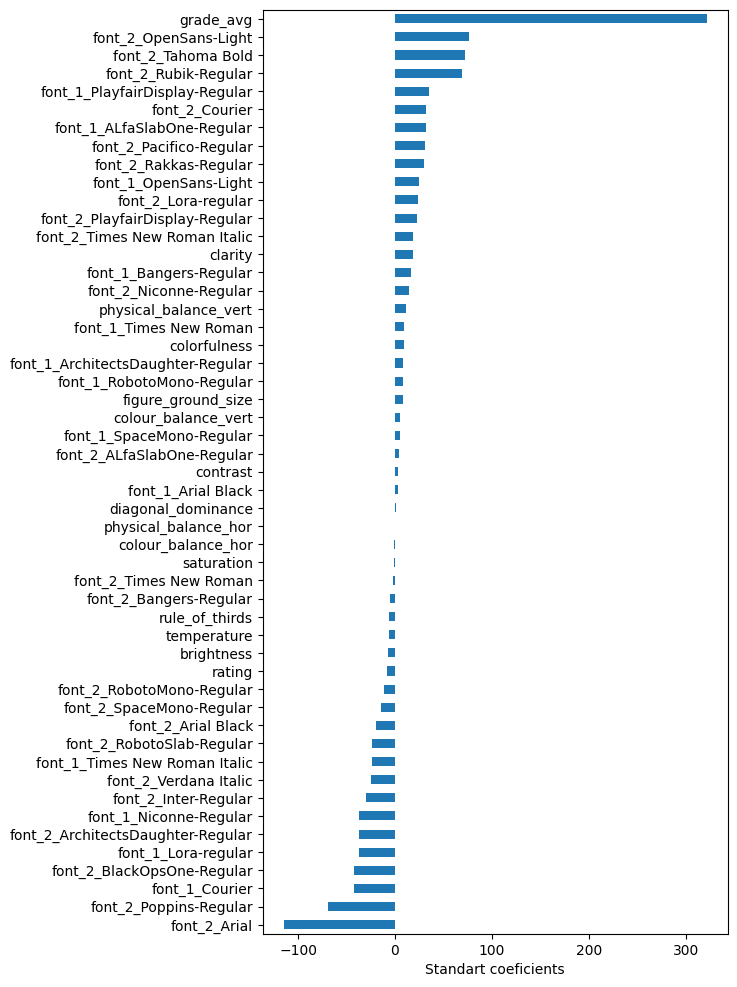

In [ ]:
fig, ax = plt.subplots(figsize = (6,12))
plot_data.plot(kind='barh')

ax.set_xlabel("Standart coeficients")

fig.savefig('Standart coeficients.png', dpi=fig.dpi, bbox_inches="tight")

In [ ]:
import statsmodels.graphics.api as smg

In [ ]:
plt.rc('font', size=8)


plt.figure(figsize=(14, 14))


<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure
import matplotlib

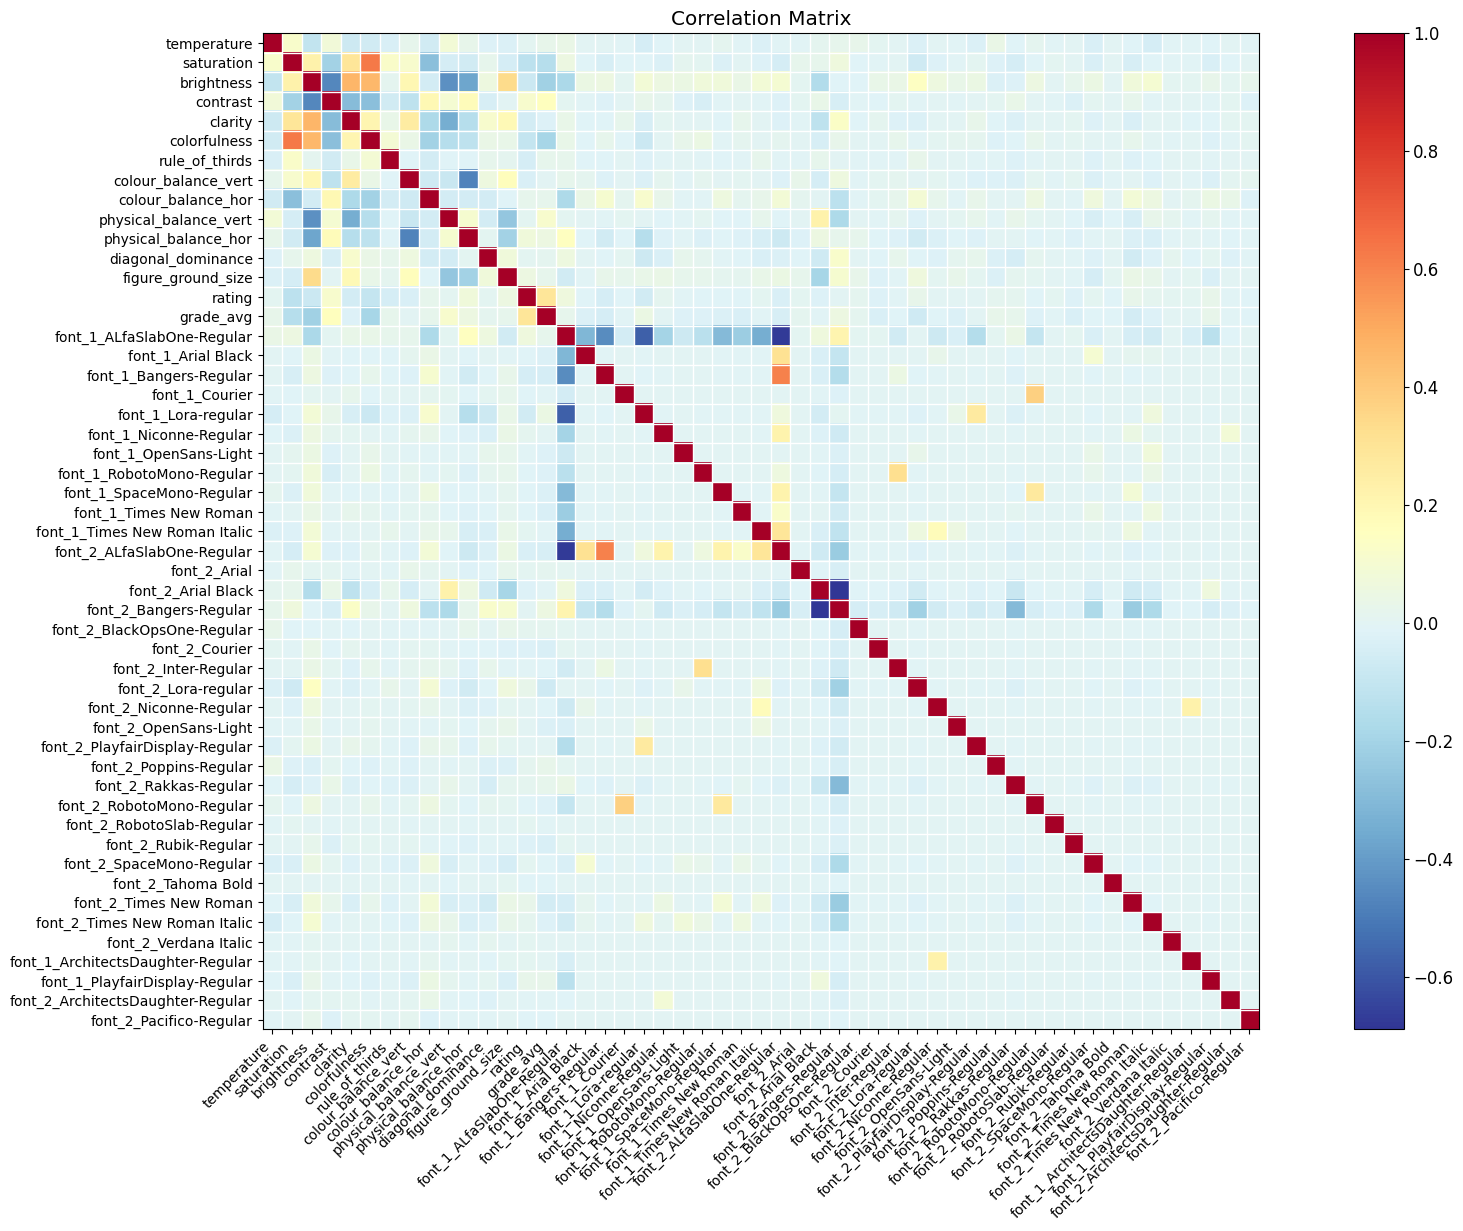

In [ ]:
correlation_matrix = np.corrcoef(X_rating.T)

# Correlation plot
plt.rc('font', size=12)
# plt.figure(figsize=(14, 14))
smg.plot_corr(correlation_matrix, xnames=X_rating.columns)
# plt.rcParams.update({'font.size': 4})


# figure(figsize=(20, 20))
# matplotlib.rc('figure', figsize=(10, 5))
#   #
plt.gcf().set_size_inches(20, 20)
plt.show()

In [ ]:
col_no_fonts =[
       'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'rating',
       'grade_avg'
]

In [ ]:
X_no_fonts = X_rating[col_no_fonts]

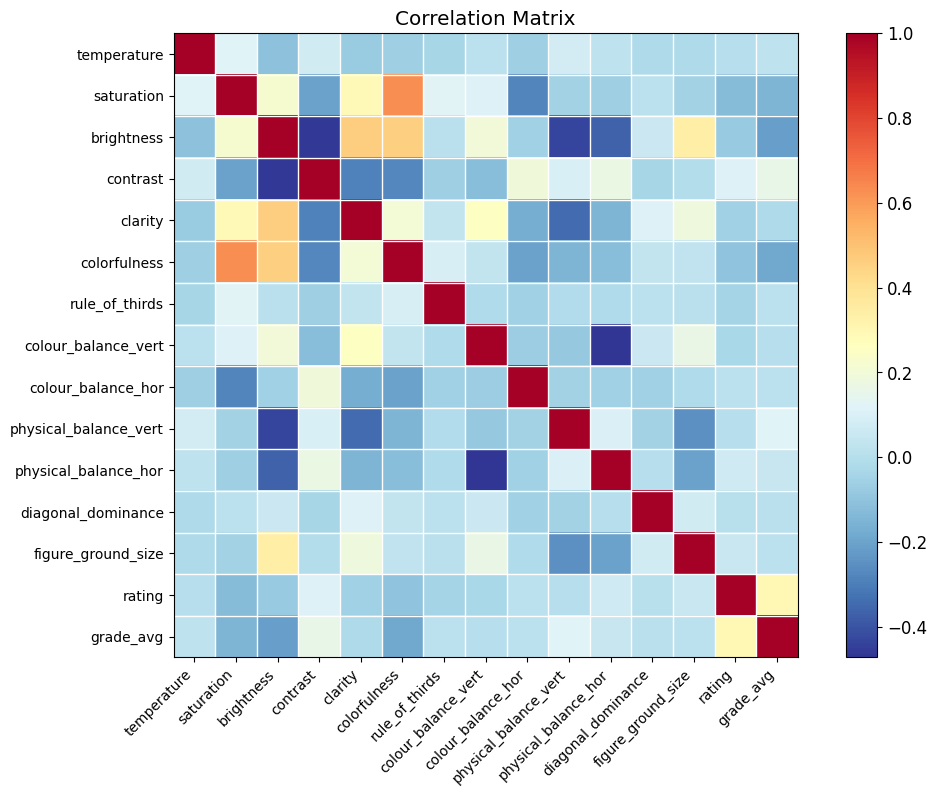

In [ ]:
correlation_matrix = np.corrcoef(X_no_fonts.T)

# Correlation plot
plt.rc('font', size=12)
# plt.figure(figsize=(14, 14))
smg.plot_corr(correlation_matrix, xnames=X_no_fonts.columns)
# plt.rcParams.update({'font.size': 4})


# figure(figsize=(20, 20))
# matplotlib.rc('figure', figsize=(10, 5))
#   #
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
import seaborn as sns

<Axes: >

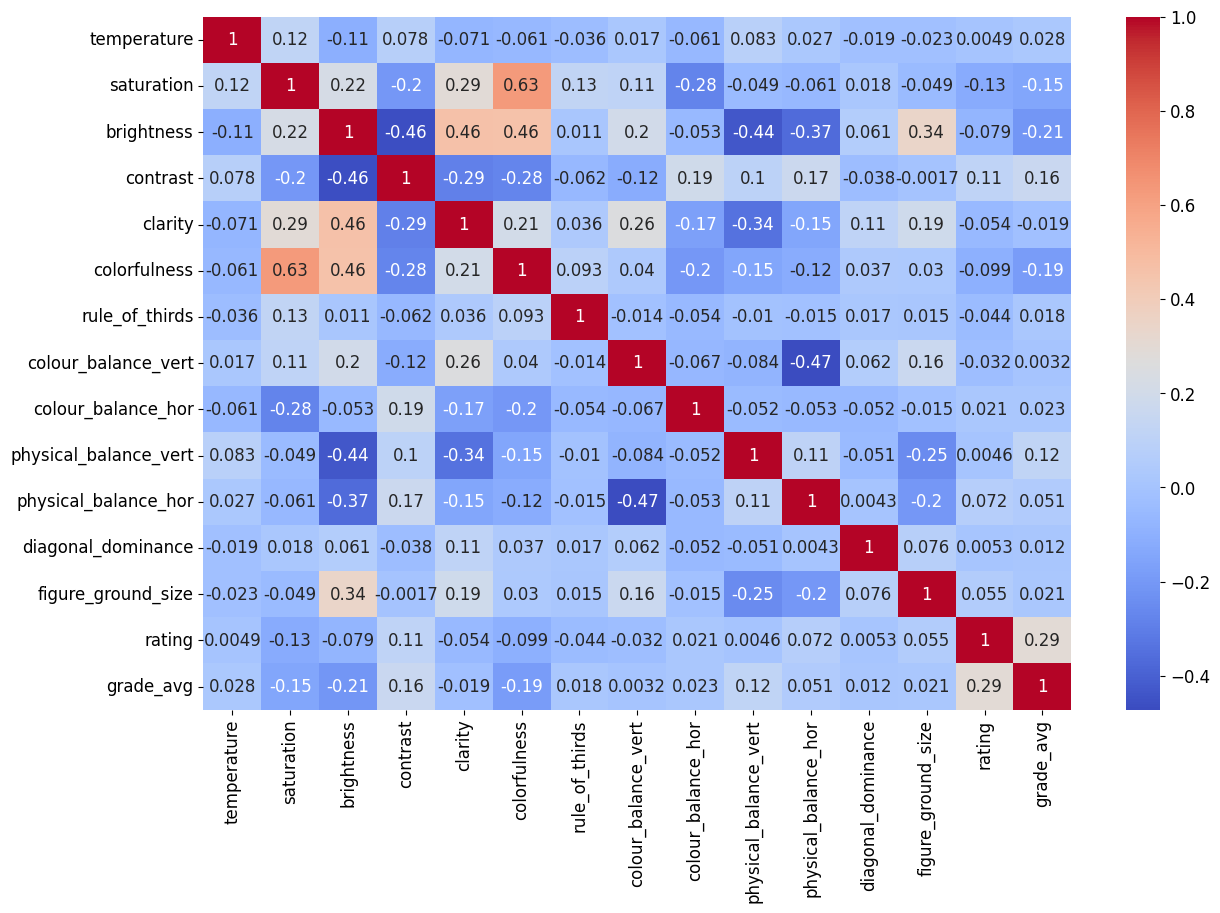

In [ ]:
corr = X_no_fonts.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
corr = X_rating.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python3 -m pip install --user plspm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00


In [ ]:
!pip install plspm

In [ ]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.scale import Scale
from plspm.mode import Mode

In [ ]:
import plspm

In [ ]:
from plspm.unidimensionality import Unidimensionality

In [ ]:
Unidimensionality(X_rating)

TypeError: Unidimensionality.__init__() missing 2 required positional arguments: 'data' and 'correction'

In [ ]:
structure = c.Structure()
config = c.Config(structure.path(), scaled=False)
structure.add_path(["temperature","saturation", "brightness", "contrast", "clarity", "colorfulness", "diagonal_domnance", "rule_of_thirds", "colour_balance_vert", "colour_balance_hor", "physical_balance_vert", "physical_balance_hor", "figure_ground_size"], ["price"])
# structure.add_path(["temperature","saturation", "brightness", "contrast", "clarity", "colorfulness", "diagonal_domnance", "rule_of_thirds", "colour_balance_vert", "colour_balance_hor", "physical_balance_vert", "physical_balance_hor", "figure_ground_size"], ["grade_avg"])

# structure.add_path(["saturation"], ["temperature", "brightness", "contrast", "clarity", "colorfulness", "diagonal_domnance", "rule_of_thirds", "colour_balance_vert", "colour_balance_hor", "physical_balance_vert", "physical_balance_hor", "figure_ground_size"])
config = c.Config(structure.path(), default_scale=Scale.NUM)
# config.add_higher_order("Satisfaction", Mode.A, ["Image", "Value"])

config.add_lv("temperature", Mode.A, df, "temperature")
config.add_lv_with_columns_named("saturation", Mode.A, df, "saturation")
config.add_lv_with_columns_named("brightness", Mode.A, df, "brightness")
config.add_lv_with_columns_named("contrast", Mode.A, df, "contrast")
config.add_lv_with_columns_named("clarity", Mode.A, df, "clarity")
config.add_lv_with_columns_named("colorfulness", Mode.A, df, "colorfulness")
config.add_lv_with_columns_named("diagonal_domnance", Mode.A, df, "diagonal_dominance")
config.add_lv_with_columns_named("rule_of_thirds", Mode.A, df, "rule_of_thirds")
config.add_lv_with_columns_named("colour_balance_vert", Mode.A, df, "colour_balance_vert")
config.add_lv_with_columns_named("colour_balance_hor", Mode.A, df, "colour_balance_hor")
config.add_lv_with_columns_named("physical_balance_vert", Mode.A, df, "physical_balance_vert")
config.add_lv_with_columns_named("physical_balance_hor", Mode.A, df, "physical_balance_hor")
config.add_lv_with_columns_named("figure_ground_size", Mode.A, df, "figure_ground_size")


AttributeError: 'DataFrame' object has no attribute 'name'

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_rating.values, i) for i in range(X_rating.shape[1])]
vif["features"] = X_rating.columns

In [ ]:
vif

,VIF Factor,features
0,1.066634,temperature
1,1.955800,saturation
2,2.503280,brightness
3,1.416809,contrast
4,1.595207,clarity
5,2.149321,colorfulness
6,1.030035,rule_of_thirds
7,1.408549,colour_balance_vert
8,1.204570,colour_balance_hor
9,1.346840,physical_balance_vert


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=8f61e642fb9d7fdab1aad8c71a549213e4942f8da423a02e7e1bd69e384fa10b
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
fa = FactorAnalyzer()
fa.fit(X_rating)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.03584719, 1.69090656, 1.28099545, 1.22702552, 1.02684483,
       1.00391182, 0.97453075, 0.87162056, 0.80361256, 0.78883887,
       0.68117505, 0.56234976, 0.45997768, 0.3567426 , 0.2356208 ])

In [ ]:
fa.loadings_

array([[ 0.07445142, -0.21084995,  0.06667178],
       [ 0.9041994 , -0.23239782,  0.05769035],
       [ 0.20021679,  0.88655714, -0.00504959],
       [-0.29343656, -0.27148317, -0.0276103 ],
       [ 0.21544656,  0.34170374,  0.15184797],
       [ 0.70027225,  0.12872823, -0.08077714],
       [ 0.1422569 , -0.02477152, -0.01511876],
       [-0.07566148, -0.20229292,  1.07659633],
       [-0.34820096,  0.1167373 , -0.04678718],
       [ 0.02220961, -0.52075392,  0.03012821],
       [ 0.04217074, -0.18401485, -0.43456868],
       [ 0.01633567,  0.06573001,  0.04253952],
       [-0.15269427,  0.37603438,  0.12472099],
       [-0.18317669, -0.01035991,  0.00192609],
       [-0.2120833 , -0.13629877,  0.0787297 ]])

In [ ]:
fa.get_communalities()

array([0.05444584, 0.87491348, 0.82609583, 0.16057045, 0.18623647,
       0.51347713, 0.02107923, 1.20570673, 0.13706055, 0.27258562,
       0.22448977, 0.0063969 , 0.18027272, 0.03366474, 0.06975505])

In [ ]:
fa.get_eigenvalues()

(array([3.03584719, 1.69090656, 1.28099545, 1.22702552, 1.02684483,
        1.00391182, 0.97453075, 0.87162056, 0.80361256, 0.78883887,
        0.68117505, 0.56234976, 0.45997768, 0.3567426 , 0.2356208 ]),
 array([ 2.57391241,  1.33832488,  0.97958798,  0.38601038,  0.22195152,
         0.1580845 ,  0.09812359,  0.04530198,  0.01125875, -0.04439261,
        -0.08428777, -0.13769909, -0.21479642, -0.24209492, -0.32253467]))

In [ ]:
fa.get_factor_variance()

(array([1.73770245, 1.61610225, 1.41294581]),
 array([0.11584683, 0.10774015, 0.09419639]),
 array([0.11584683, 0.22358698, 0.31778337]))

In [ ]:
X_rating.to_csv("for_pls.csv", index=False)

In [ ]:
X_rating["price"] = y

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pr, y)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)
list(zip(col_with_price, linreg.coef_))

4.704297267202492
[ 6.07688054e-03 -1.99389651e-02 -2.46829588e-02  1.81966239e-02
  1.00988881e-01 -1.06803569e-02  1.36950346e-02 -1.21181409e-03
 -6.27717415e-03  2.03500903e-02 -1.64614133e-03  3.47657581e-03
  2.44316639e-03  1.14759442e-04  2.31670586e-03 -4.61574408e-02
 -4.67845718e-02 -1.42422785e-01  1.78234374e-01  5.46383697e-02
 -6.10770152e-03 -6.68995071e-02 -2.26058921e-02 -1.72039822e-01
  4.58640959e-02  5.88529767e-02  2.76628058e-01  7.11575206e-02
  8.34538208e-02  1.61069298e-01 -2.30722819e-01  1.86081328e-01
  9.51891906e-03 -3.89444828e-02 -3.80689597e-01 -6.31594395e-02
  4.03015015e-01  8.56929613e-02  5.06811706e-02 -1.35168467e-01
 -3.25230029e-01  7.69585070e-02 -4.00528523e-01  9.32523032e-03
  2.75188995e-02  1.30234234e-01  1.11022302e-16  2.21964174e-01
 -1.96397088e-02 -3.61048723e-02  4.65800904e-01 -8.53275343e-02
 -2.15305124e-01 -3.88020918e-01 -3.36181477e-01 -3.53311113e-01
 -5.68716671e-01  9.79516737e-01  3.38261018e-01 -5.38064544e-01]


[('temperature', 0.006076880539001964),
 ('saturation', -0.019938965093398757),
 ('brightness', -0.024682958797810635),
 ('contrast', 0.018196623936486647),
 ('clarity', 0.10098888129966203),
 ('colorfulness', -0.01068035686829015),
 ('rule_of_thirds', 0.013695034596682323),
 ('colour_balance_vert', -0.0012118140880774675),
 ('colour_balance_hor', -0.006277174153564893),
 ('physical_balance_vert', 0.02035009032470307),
 ('physical_balance_hor', -0.0016461413335234626),
 ('diagonal_dominance', 0.0034765758058275817),
 ('figure_ground_size', 0.002443166386791154),
 ('price', 0.00011475944192585602),
 ('font_1_ALfaSlabOne-Regular', 0.0023167058634465084),
 ('font_1_Arial Black', -0.04615744077627968),
 ('font_1_Bangers-Regular', -0.04678457183096521),
 ('font_1_Courier', -0.1424227846782782),
 ('font_1_Lora-regular', 0.17823437419380053),
 ('font_1_Niconne-Regular', 0.0546383696870453),
 ('font_1_OpenSans-Light', -0.0061077015187132044),
 ('font_1_RobotoMono-Regular', -0.06689950710676976

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.19788844502528266
0.06388743836490941
0.2527596454438671


In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip


def plot_linearity(X, y, model):
    predictions = model.predict(X)
    line_coords = np.arange(y.min().min(), y.max().max())
    plt.scatter(predictions, y)
    plt.ylabel("Labels")
    plt.xlabel("Predictions")
    plt.plot(line_coords,line_coords, color='darkorange', linestyle='--', linewidth=3)
    plt.show()

def detect_outliers(X):
    X_temp = X.copy()
    for col in X.columns:
        UPPER, LOWER = np.percentile(X[col], [1,99])
        X_temp[col] = np.clip(X[col],UPPER, LOWER)
    return X_temp

# X_without_outliers = detect_outliers(X_scaled)
# X_const = sm.add_constant(X_scaled).astype(float)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.pyplot import figure
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from scipy import stats


def vif_test(X):
    vif = pd.DataFrame([variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))], X.columns)

    return vif[vif.values > 3] if  not vif[vif.values > 5].empty else "All vif's < 3"

def correlation_test(X):
    corr = X.corr().abs()
    sorted_corr = corr.unstack().sort_values(kind="quicksort")
    return sorted_corr[(sorted_corr < 1) & (sorted_corr > 0.5)].drop_duplicates()




def het_breuschpagan(model):
    names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
    test = sms.het_breuschpagan(model.resid, model.model.exog)
    return lzip(names, test)

def plot_residuals(model, col):
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

In [ ]:
X_pr = X_pr.fillna(0)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:2015: RuntimeWarning: divide by zero encountered in divide
  self.het_scale = (self.wresid / (1 - h))**2


1. Linearity


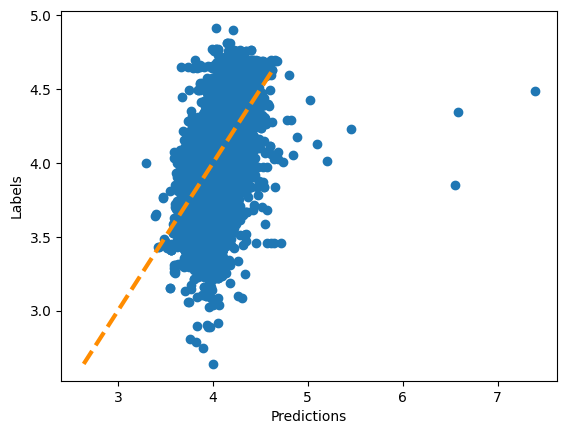

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


4. Normality of error 
 Shapiro's test p-value = 5.071018882698648e-41 



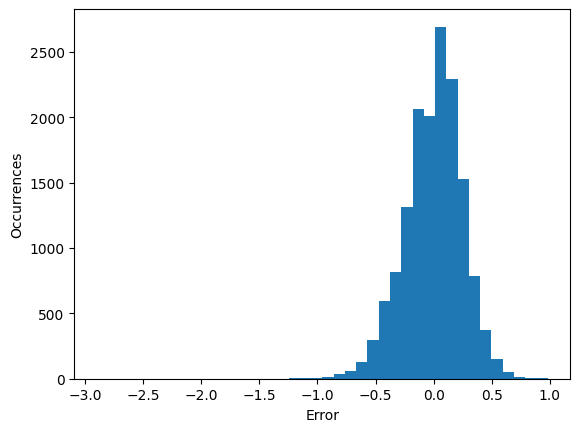

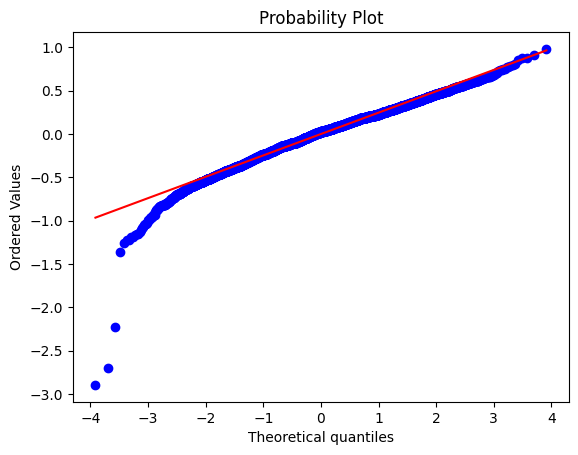

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                nan
Time:                        11:33:04   Log-Likelihood:                -447.67
No. Observations:               15238   AIC:                             1013.
Df Residuals:                   15179   BIC:                             1464.
Df Model:                          58                                         
Covariance Type:                  HC3                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
temperature                           0.0057        inf          0      1.000        -inf         inf
saturation                           -0.0201        inf         -0      1.000        -inf         inf
brightness                           -0.0306        inf         -0      1.000        -inf         inf
contrast                              0.0151        inf          0      1.000        -inf         inf
clarity                               0.0970        inf          0      1.000        -inf         inf
colorfulness                         -0.0067        inf         -0      1.000        -inf         inf
rule_of_thirds                        0.0111        inf          0      1.000        -inf         inf
colour_balance_vert                  -0.0009        inf         -0      1.000        -inf         inf
colour_balance_hor                   -0.0057        inf         -0      1.000        -inf         inf
physical_balance_vert                 0.0192        inf          0      1.000        -inf         inf
physical_balance_hor                 -0.0003        inf         -0      1.000        -inf         inf
diagonal_dominance                    0.0024        inf          0      1.000        -inf         inf
figure_ground_size                    0.0052        inf          0      1.000        -inf         inf
price                                 0.0001        inf          0      1.000        -inf         inf
font_1_ALfaSlabOne-Regular            2.9713        inf          0      1.000        -inf         inf
font_1_Arial Black                    2.9329        inf          0      1.000        -inf         inf
font_1_Bangers-Regular                2.9197        inf          0      1.000        -inf         inf
font_1_Courier                        2.8132        inf          0      1.000        -inf         inf
font_1_Lora-regular                   3.1596        inf          0      1.000        -inf         inf
font_1_Niconne-Regular                3.0227        inf          0      1.000        -inf         inf
font_1_OpenSans-Light                 2.9728        inf          0      1.000        -inf         inf
font_1_RobotoMono-Regular             3.0074        inf          0      1.000        -inf         inf
font_1_SpaceMono-Regular              2.9428        inf          0      1.000        -inf         inf
font_1_Times New Roman                2.8282        inf          0      1.000        -inf         inf
font_1_Times New Roman Italic         3.0396        inf          0      1.000        -inf         inf
font_2_ALfaSlabOne-Regular            1.7408        inf          0      1.000        -inf         inf
font_2_Arial                          1.9710        inf          0      1.000        -inf         inf
font_2_Arial Black     

In [ ]:
# X_modelling = X_res[df['Author'] == "lucio fontana"].drop(columns = ['itten_features', 'number_of_segments', 'square_m', 'area_of_fls'], axis = 1).join(X_const[[ "Sotheby's"]])
# y_modelling = y[df['Author'] == "lucio fontana"]
X_modelling = X_pr
y_modelling = y

model = sm.OLS(list(y_modelling), X_modelling).fit(cov_type='HC3')
prediction = model.predict(X_modelling)
error = y_modelling - prediction

print("1. Linearity")
plot_linearity(X_modelling, y_modelling, model)

# print("2. Homoskedacity \n Breusch_pagan's test p-value = {} \n".format(het_breuschpagan(model)[1][1]))
# print("3. Multicollinearity \n {} \n".format(vif_test(X_modelling.drop(['const'], axis = 1))))
print("4. Normality of error \n Shapiro's test p-value = {} \n".format(stats.shapiro(error)[1]))
plt.hist(error, bins = 40)
plt.xlabel("Error")
plt.ylabel("Occurrences")
plt.show()
stats.probplot(error, dist="norm", plot=plt)
plt.show()
model.summary(alpha=0.05)

1. Linearity


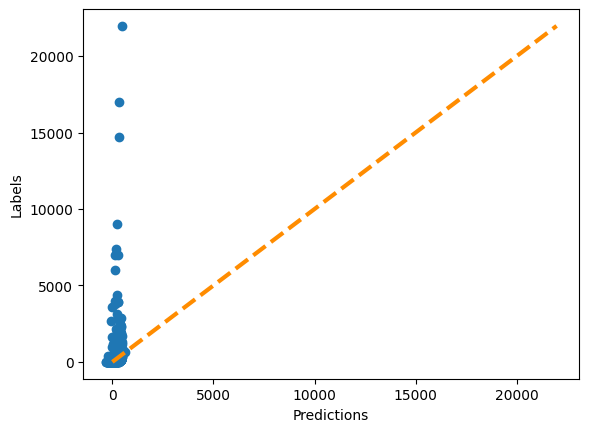

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


4. Normality of error 
 Shapiro's test p-value = 0.0 



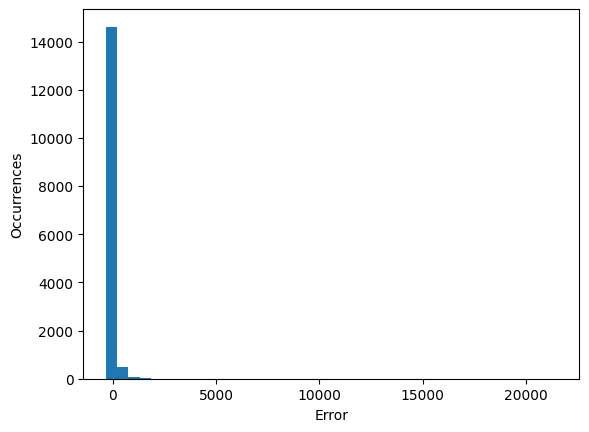

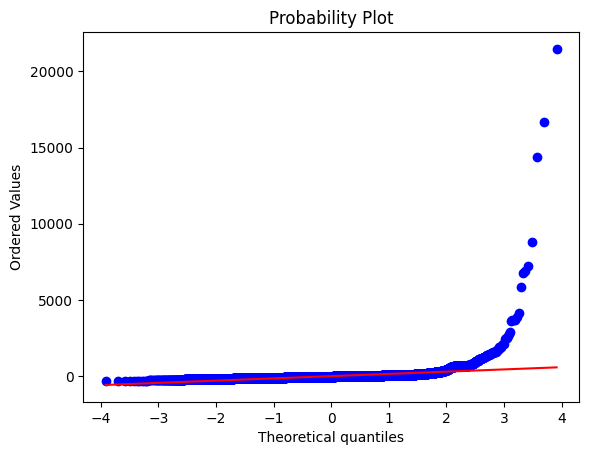

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                nan
Time:                        11:39:39   Log-Likelihood:            -1.1015e+05
No. Observations:               15238   AIC:                         2.204e+05
Df Residuals:                   15178   BIC:                         2.209e+05
Df Model:                          59                                         
Covariance Type:                  HC3                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
temperature                          -6.2853      2.018     -3.115      0.002     -10.240      -2.330
saturation                            3.8890      3.527      1.103      0.270      -3.023      10.801
brightness                           -2.5413      5.834     -0.436      0.663     -13.976       8.893
contrast                              1.5881      3.043      0.522      0.602      -4.377       7.553
clarity                              27.9240      8.818      3.167      0.002      10.642      45.206
colorfulness                          9.7288      3.883      2.505      0.012       2.118      17.340
rule_of_thirds                       -4.4224      1.376     -3.214      0.001      -7.119      -1.726
colour_balance_vert                   0.9604      3.847      0.250      0.803      -6.580       8.501
colour_balance_hor                   -3.8674      3.966     -0.975      0.329     -11.640       3.905
physical_balance_vert                10.1436      3.444      2.945      0.003       3.394      16.893
physical_balance_hor                  1.0342      3.081      0.336      0.737      -5.004       7.072
diagonal_dominance                   -0.1877      2.608     -0.072      0.943      -5.300       4.925
figure_ground_size                    3.1901      2.586      1.234      0.217      -1.879       8.259
rating                               -5.8644      1.703     -3.443      0.001      -9.202      -2.526
grade_avg                           268.3110     15.211     17.640      0.000     238.499     298.123
font_1_ALfaSlabOne-Regular         -552.7214    539.492     -1.025      0.306   -1610.106     504.663
font_1_Arial Black                 -564.1339    539.427     -1.046      0.296   -1621.390     493.123
font_1_Bangers-Regular             -543.8541    539.271     -1.008      0.313   -1600.805     513.097
font_1_Courier                     -609.5946    539.697     -1.130      0.259   -1667.381     448.192
font_1_Lora-regular                -598.3939    539.607     -1.109      0.267   -1656.005     459.217
font_1_Niconne-Regular             -613.7651    539.314     -1.138      0.255   -1670.802     443.272
font_1_OpenSans-Light              -535.3449    543.417     -0.985      0.325   -1600.423     529.733
font_1_RobotoMono-Regular          -552.8380    539.595     -1.025      0.306   -1610.424     504.748
font_1_SpaceMono-Regular           -579.8321    539.851     -1.074      0.283   -1637.921     478.257
font_1_Times New Roman             -573.2866    539.750     -1.062      0.288   -1631.177     484.604
font_1_Times New Roman Italic      -611.9664    539.908     -1.133      0.257   -1670.167     446.235
font_2_ALfaSlabOne-Regular         -333.0346    535.616     -0.622      0.534   -1382.822     716.753
font_2_Arial           

In [ ]:
X_modelling = X_rating
y_modelling = y_pr

model = sm.OLS(list(y_modelling), X_modelling).fit(cov_type='HC3')
prediction = model.predict(X_modelling)
error = y_modelling - prediction

print("1. Linearity")
plot_linearity(X_modelling, y_modelling, model)

# print("2. Homoskedacity \n Breusch_pagan's test p-value = {} \n".format(het_breuschpagan(model)[1][1]))
# print("3. Multicollinearity \n {} \n".format(vif_test(X_modelling.drop(['const'], axis = 1))))
print("4. Normality of error \n Shapiro's test p-value = {} \n".format(stats.shapiro(error)[1]))
plt.hist(error, bins = 40)
plt.xlabel("Error")
plt.ylabel("Occurrences")
plt.show()
stats.probplot(error, dist="norm", plot=plt)
plt.show()
model.summary(alpha=0.05)

## Статистические штуки

In [5]:
frames = [dft,dfp]
df = pd.concat(frames)
df = df.fillna(0)

In [9]:
cols = ['temperature', 'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size',
       'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_Poppins-Regular',
       'font_2_Rakkas-Regular', 'font_2_RobotoMono-Regular',
       'font_2_RobotoSlab-Regular', 'font_2_Rubik-Regular',
       'font_2_SpaceMono-Regular', 'font_2_Tahoma Bold',
       'font_2_Times New Roman', 'font_2_Times New Roman Italic',
       'font_2_Verdana Italic', 'num_review', 'wine_type_Dessert',
       'wine_type_Red', 'wine_type_Rose', 'wine_type_Sparkling',
       'wine_type_White', 'year', 'followers', 'following', 'user_ratings',
       'font_1_ArchitectsDaughter-Regular', 'font_1_PlayfairDisplay-Regular',
       'font_2_ArchitectsDaughter-Regular', 'font_2_Pacifico-Regular']

In [10]:
X = df[df["quality"] == 1][cols]
X.head(2)

,temperature,saturation,brightness,contrast,clarity,colorfulness,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,...,wine_type_Sparkling,wine_type_White,year,followers,following,user_ratings,font_1_ArchitectsDaughter-Regular,font_1_PlayfairDisplay-Regular,font_2_ArchitectsDaughter-Regular,font_2_Pacifico-Regular
0,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,-0.180086,1.062009,-0.292457,0.214080,...,0,0,0.670886,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,-0.180082,-0.688356,-0.770617,0.806691,...,0,0,0.822785,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y = np.log2(df[df["quality"] == 1].price)

In [20]:
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(y, X).fit()

In [21]:
coefs = model.params[0:]

In [22]:
features = []
for name in coefs.index:
    features.append(name)

In [23]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        21:12:09   Log-Likelihood:                -26130.
No. Observations:               15238   AIC:                         5.238e+04
Df Residuals:                   15180   BIC:                         5.282e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
temper

In [25]:
cf = list(zip(coefs,features))
cf_featimpsort = sorted(cf,key=lambda x: (-abs(x[0])))
for cf in cf_featimpsort:
  print(cf[0],"\t",cf[1])

6.957412190858842 	 font_1_PlayfairDisplay-Regular
6.688582548645736 	 font_1_Lora-regular
5.827305262618607 	 font_1_Times New Roman Italic
5.8262287115869995 	 font_1_ArchitectsDaughter-Regular
5.80683057052771 	 font_1_ALfaSlabOne-Regular
5.699376115526081 	 font_1_OpenSans-Light
5.603233193767118 	 font_1_RobotoMono-Regular
5.518151141290729 	 font_1_Bangers-Regular
5.448063234500926 	 font_1_Arial Black
5.295552249627422 	 font_1_SpaceMono-Regular
5.284628385678618 	 font_1_Niconne-Regular
5.2756188882999515 	 font_1_Courier
5.088874525900706 	 font_1_Times New Roman
-5.040036112933071 	 year
4.89199049388525 	 font_2_Verdana Italic
4.781892317069694 	 font_2_Poppins-Regular
4.73906949610154 	 followers
4.300468992313115 	 font_2_BlackOpsOne-Regular
3.629542178471149 	 font_2_Arial
3.4252198757912087 	 font_2_ALfaSlabOne-Regular
3.4086412226221756 	 font_2_Bangers-Regular
3.3838837839536744 	 font_2_Niconne-Regular
3.3654560837817744 	 font_2_Rakkas-Regular
3.356774119454698 	 fon

In [26]:
corr = X.corrwith(y)
corr

temperature                          0.017112
saturation                          -0.151298
brightness                          -0.217314
contrast                             0.167358
clarity                             -0.042411
colorfulness                        -0.184903
rule_of_thirds                      -0.002781
colour_balance_vert                  0.005135
colour_balance_hor                   0.049142
physical_balance_vert                0.133628
physical_balance_hor                 0.048990
diagonal_dominance                   0.008785
figure_ground_size                   0.042243
font_1_ALfaSlabOne-Regular           0.027670
font_1_Arial Black                  -0.030010
font_1_Bangers-Regular              -0.038767
font_1_Courier                      -0.002634
font_1_Lora-regular                  0.042870
font_1_Niconne-Regular              -0.014739
font_1_OpenSans-Light               -0.017511
font_1_RobotoMono-Regular           -0.028542
font_1_SpaceMono-Regular          

In [27]:
order = corr.map(lambda x : x).abs().sort_values(ascending = False)
order

year                                 0.426489
wine_type_Red                        0.258869
following                            0.224337
brightness                           0.217314
wine_type_White                      0.211711
followers                            0.199217
colorfulness                         0.184903
contrast                             0.167358
saturation                           0.151298
physical_balance_vert                0.133628
wine_type_Rose                       0.121992
wine_type_Sparkling                  0.103422
user_ratings                         0.088537
num_review                           0.078429
colour_balance_hor                   0.049142
physical_balance_hor                 0.048990
font_2_Bangers-Regular               0.045077
font_2_ALfaSlabOne-Regular           0.044289
font_1_Lora-regular                  0.042870
font_2_Lora-regular                  0.042619
clarity                              0.042411
figure_ground_size                

In [28]:
from sklearn.linear_model import LinearRegression

r2_arr = []
for i in range(len(features)):
  data = X[X.columns[i]]
  model = LinearRegression()
  data = data.values.reshape(-1,1)
  # data = data.values.reshape(1,-1)
#fit regression model
  model.fit(data, y)

  # Difference in loss determines the importance
  # model = sm.OLS(y24, data).fit()
  r_squared = model.score(data, y)
  r2_arr.append((features[i], r_squared))
  # print(f"{features[i]:<8}", "\t\t\t", f"{all_loss - loss_feature:.3f}")
r2_sorted = sorted(r2_arr, key=lambda x: (-x[1]))
for cf in r2_sorted:
  print('{0: <40}'.format(cf[0]),cf[1])


year                                     0.18189264469221578
wine_type_Red                            0.06701332865633602
following                                0.050327107556572104
brightness                               0.04722547786723563
wine_type_White                          0.044821396565201455
followers                                0.03968739915771058
colorfulness                             0.03418902883410402
contrast                                 0.028008573234092893
saturation                               0.02289122865018034
physical_balance_vert                    0.017856320572247952
wine_type_Rose                           0.014882048398875192
wine_type_Sparkling                      0.010696062854704147
user_ratings                             0.007838774310533814
num_review                               0.006151106563920816
colour_balance_hor                       0.002414893440462418
physical_balance_hor                     0.002399976587281749
font_2_Bangers

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error as mse


def loss_calc(data):
  X_train, X_val, y_train, y_val = train_test_split(
    data, y, test_size=0.33, random_state=0)
  model = Ridge(alpha=1e-2).fit(X_train, y_train)
  y_predict = model.predict(X_val)
  return np.mean(np.absolute(y_predict - y_val))
  # return mse(y_val, y_predict)


all_loss = loss_calc(X)

loss_arr = []
for i in range(len(features)):
  data = []
  for j in range(len(features)):
    if i != j:
      data.append(X[X.columns[j]])
  # Difference in loss determines the importance
  loss_feature = loss_calc(np.transpose(np.array(data)))
  loss_arr.append((features[i], all_loss - loss_feature))
  # print(f"{features[i]:<8}", "\t\t\t", f"{all_loss - loss_feature:.3f}")
loss_sorted = sorted(loss_arr, key=lambda x: (x[1]))
for cf in loss_sorted:
  print('{0: <40}'.format(cf[0]),cf[1])

year                                     -0.11021495731410891
followers                                -0.008344913008616839
user_ratings                             -0.007505731936111593
following                                -0.007062456587277888
brightness                               -0.003253965072157694
num_review                               -0.0028063611097597363
rule_of_thirds                           -0.0003629804205664833
contrast                                 -0.0002131708286279288
wine_type_Red                            -0.00020012661100832219
colour_balance_vert                      -0.0001880954013284697
wine_type_Sparkling                      -0.00015855916849916163
wine_type_Rose                           -9.702106480147243e-05
wine_type_White                          -8.536864915775766e-05
temperature                              -7.347306251204166e-05
colour_balance_hor                       -6.67104906049154e-05
font_2_Poppins-Regular                   -2.5